## Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Check if we need to change directory to the project root
if os.path.basename(current_dir) == 'Scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'Scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# Import modules
try:
    from preprocessing import ReviewPreprocessor
    try:
        from scraper import main as run_scraper
    except ImportError:
        from scraper import main as run_scraper
except ImportError as e:
    # Fallback logic if imports fail directly
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

Current working directory: c:\Users\hp\Desktop\python-projects\GooglePlay-scraping_week-2\Scripts
Changed working directory to: c:\Users\hp\Desktop\python-projects\GooglePlay-scraping_week-2


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Fetching app info...

Scraping reviews...


  0%|          | 0/3 [00:00<?, ?it/s]

Scraping 450 reviews for app ID: com.combanketh.mobilebanking...


 33%|███▎      | 1/3 [00:07<00:14,  7.25s/it]

Successfully scraped 8119 reviews.
Scraping 450 reviews for app ID: com.boa.boaMobileBanking...


 67%|██████▋   | 2/3 [00:09<00:04,  4.47s/it]

Successfully scraped 1185 reviews.
Scraping 450 reviews for app ID: com.dashen.dashensuperapp...


100%|██████████| 3/3 [00:11<00:00,  3.98s/it]

Successfully scraped 764 reviews.
Sample reviews:
                              review_id  \
0  5112423d-e618-44ba-ba49-62677cb76cd6   
1  bcb34681-1dd4-4781-b400-4393bb10b1d9   
2  c69f051a-00f8-4144-8423-b7ebcd328d2d   

                                         review_text  rating  \
0  This application is very important and advanta...       5   
1                          why didn't work this app?       1   
2      The app makes our life easier. Thank you CBE!       5   

          review_date      user_name  thumbs_up reply_content bank_code  \
0 2025-11-27 23:08:20  A Google user          0          None       CBE   
1 2025-11-27 22:40:35  A Google user          0          None       CBE   
2 2025-11-27 18:00:06  A Google user          0          None       CBE   

                     bank_name app_id             source  
0  Commercial Bank of Ethiopia         Google Play Store  
1  Commercial Bank of Ethiopia         Google Play Store  
2  Commercial Bank of Ethiopia         Goo

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
1,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
2,c69f051a-00f8-4144-8423-b7ebcd328d2d,The app makes our life easier. Thank you CBE!,5,2025-11-27 18:00:06,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
3,d2995fb9-63c6-4bfc-8d3c-93a0ee9dba8f,this app very bad 👎,1,2025-11-27 16:28:10,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
4,f8002d06-b5c5-4ed1-9d51-a9a379304cf8,the most advanced app. but how to stay safe?,5,2025-11-27 10:03:41,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [3]:
import pandas as pd

# 1. Load raw data
raw_path = "data/raw/raw_reviews.csv"
df = pd.read_csv(raw_path)

print(f"Loaded {len(df)} rows")

# 2. Remove rows where 'user_name' is null or empty
before = len(df)

df = df[df['user_name'].notna() & (df['user_name'].astype(str).str.strip() != "")]

after = len(df)

print(f"Removed {before - after} rows with null or empty user_name")
print(f"Remaining rows: {after}")

# 3. Save cleaned data
df.to_csv(raw_path, index=False)
print(f"Cleaned file saved to: {raw_path}")


Loaded 10068 rows
Removed 0 rows with null or empty user_name
Remaining rows: 10068
Cleaned file saved to: data/raw/raw_reviews.csv


In [4]:
df.sample(5)

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
9930,a34ea67e-01a2-487d-b414-b2d41d0572a2,I have used many mobile banking and also telle...,5,2025-03-12 09:52:45,yibe teklu,24,NaN,DASHENBANK,Dashen Bank,NaN,Google Play Store
3015,a430cccc-982c-4ea8-926a-2c6a085200a7,700000 a,5,2024-06-26 23:33:22,A Google user,1,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store
3116,3d495514-cd0d-40f5-b3e7-bbfe295b0059,This application is very useful and incredible...,5,2024-05-31 20:50:07,A Google user,3,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store
8106,ff77591e-52cc-4783-89ea-5018a376d6e8,As wr wb,5,2014-02-26 00:46:53,A Google user,2,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store
5446,fe581ce0-d9b6-4838-9c32-8d98de12f16e,"The app is good. However, whenever you changed...",3,2023-03-10 21:54:58,A Google user,97,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store


## Describing data but per bank

In [6]:
import pandas as pd

df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Generate describe() per bank
bank_descriptions = df.groupby("bank_code").describe()

print(bank_descriptions)


            rating                                             
             count      mean       std  min  25%  50%  75%  max
bank_code                                                      
BOA          720.0  2.577778  1.801577  1.0  1.0  1.0  5.0  5.0
CBE         4542.0  3.770586  1.606455  1.0  2.0  5.0  5.0  5.0
DASHENBANK   490.0  4.075510  1.541655  1.0  3.0  5.0  5.0  5.0


In [7]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 10068 reviews

[1/6] Checking for missing data...

Missing values:
  review_text: 7 (0.07%)
  reply_content: 9997 (99.29%)
  app_id: 10068 (100.00%)

review_text    7
dtype: int64

[2/6] Handling missing values...
Removed 7 rows with missing critical values

[3/6] Normalizing dates...
Date range: 2014-02-17 to 2025-11-27

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 10061 reviews

Saving processed data...
Data saved to: data/processed/processed_reviews.csv

PREPROCESSING REPORT

Original records: 10068
Records with missing critical data: 7
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 10061

Data retention rate: 99.93%
Data error rate: 0.07%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Commercial Bank of Ethiopia: 8112
  Bank of Abyssinia: 1185
  Dashen Bank: 764

Rating distribution:
  ⭐⭐⭐⭐⭐: 6347 (63.1%)
  ⭐⭐⭐⭐: 

## 3. Visualizations

Let's explore the cleaned data.

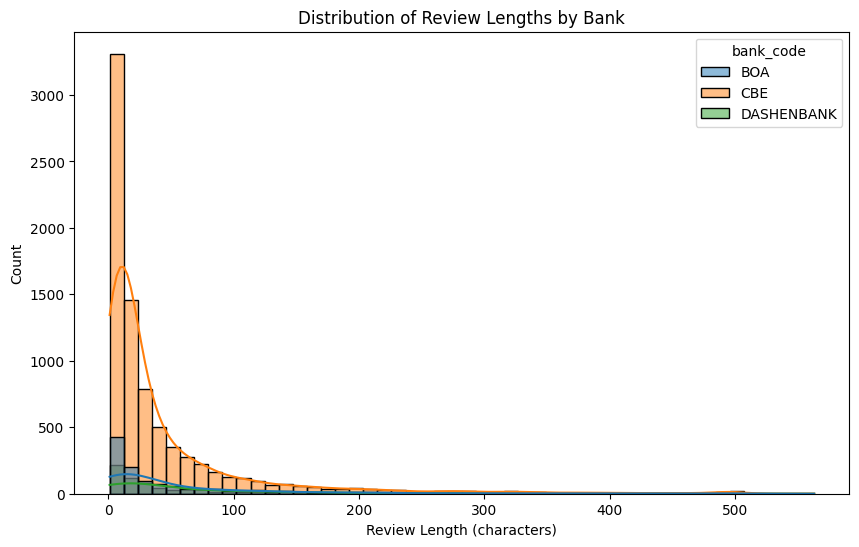

In [8]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()

## More preprocessing 
Remove duplicates, handle missing data.
Normalize dates (e.g., to YYYY-MM-DD).
Save as CSV with columns: review, rating, date, bank, source.

In [9]:
import pandas as pd

# ============================
# 1. Load raw data
# ============================
raw_path = "data/raw/raw_reviews.csv"
df = pd.read_csv(raw_path)

print(f"Loaded {len(df)} rows")

# ============================
# 2. Remove duplicates
# ============================
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Removed {before - after} duplicate rows")

# ============================
# 3. Handle missing data
#    - Remove rows where review or rating is missing
# ============================
before = len(df)

required_cols = ["review_text", "rating", "review_date", "bank_name", "source"]

df = df.dropna(subset=required_cols)

after = len(df)
print(f"Removed {before - after} rows with missing critical fields")

# ============================
# 4. Normalize date format
#    Convert any date format → YYYY-MM-DD
# ============================
df["date"] = pd.to_datetime(df["review_date"], errors="coerce").dt.date

# Remove rows where date could not be parsed
df = df.dropna(subset=["date"])

# Convert date objects to string
df["date"] = df["date"].astype(str)

# ============================
# 5. Keep only required columns
# ============================
df = df[["review_text", "rating", "review_date", "bank_name", "bank_code", "source"]]

# ============================
# 6. Save cleaned data
# ============================
clean_path = "data/processed/cleaned_reviews.csv"
df.to_csv(clean_path, index=False)

print(f"Cleaned data saved to: {clean_path}")
print(f"Final row count: {len(df)}")


Loaded 10068 rows
Removed 0 duplicate rows
Removed 7 rows with missing critical fields
Cleaned data saved to: data/processed/cleaned_reviews.csv
Final row count: 10061


## Categorizing banks by bank_code 

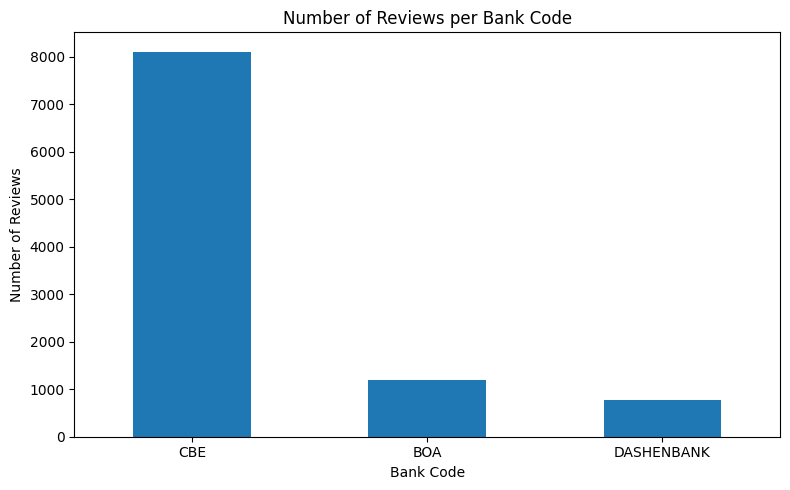

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# If your cleaned file is already saved:
df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Count reviews per bank_code
bank_counts = df["bank_code"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
bank_counts.plot(kind="bar")

plt.xlabel("Bank Code")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Bank Code")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## Deleting duplicate rows

In [12]:
import pandas as pd

# Load your data
df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Count duplicates BEFORE removal
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows found: {duplicate_count}")

# Drop duplicates
df = df.drop_duplicates()

print(f"Duplicate rows removed: {duplicate_count}")
print(f"Remaining rows: {len(df)}")

# Save cleaned file
df.to_csv("data/processed/cleaned_reviews.csv", index=False)

print("\nCleaned dataframe saved to data/processed/cleaned_reviews.csv")


Number of duplicate rows found: 0
Duplicate rows removed: 0
Remaining rows: 10061

Cleaned dataframe saved to data/processed/cleaned_reviews.csv


## using langdetect to remove all Amharic texts

In [13]:
from langdetect import detect, LangDetectException
import pandas as pd

# Load data
df = pd.read_csv("data/processed/cleaned_reviews.csv")

def is_english(text):
    try:
        return detect(text) == "en"
    except LangDetectException:
        return False   # treat failed detection as non-English

# Count rows *before* filtering (by bank)
before_counts = df.groupby("bank_code").size()

# Apply English filter
filtered_df = df[df["review_text"].apply(is_english)]

# Count rows *after* filtering
after_counts = filtered_df.groupby("bank_code").size()

# Compute deleted rows per bank_code
deleted_counts = before_counts - after_counts

# Print results
print("=== Non-English Reviews Removed Per Bank ===\n")

for bank in before_counts.index:
    print(f"{bank}: Deleted {deleted_counts.get(bank, 0)} reviews "
          f"(Before: {before_counts[bank]}, After: {after_counts.get(bank, 0)})")

# Save the filtered dataframe
filtered_df.to_csv("data/processed/cleaned_reviews.csv", index=False)

print("\nCleaned file saved to data/processed/cleaned_reviews.csv")


=== Non-English Reviews Removed Per Bank ===

BOA: Deleted 453 reviews (Before: 1185, After: 732)
CBE: Deleted 3508 reviews (Before: 8112, After: 4604)
DASHENBANK: Deleted 271 reviews (Before: 764, After: 493)

Cleaned file saved to data/processed/cleaned_reviews.csv


## Checking the data after the use of langdetect to remove Amharic reviews

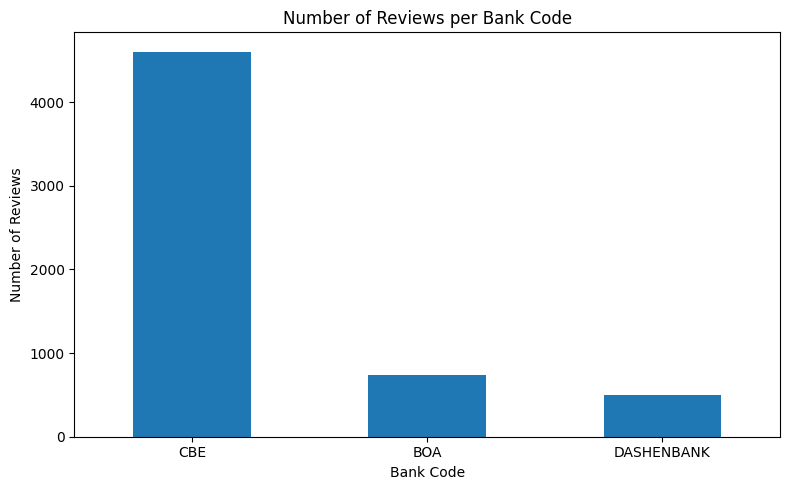

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# If your cleaned file is already saved:
df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Count reviews per bank_code
bank_counts = df["bank_code"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
bank_counts.plot(kind="bar")

plt.xlabel("Bank Code")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Bank Code")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## Randomly deleting 3000 of the scrapped 4000

* the point of removing the data is because the CBE data is 4 times as much and it might end up skewing the entire result.

In [2]:
import pandas as pd

# Load your data
df = pd.read_csv("../Data/processed/cleaned_reviews.csv")

# Filter CBE rows
cbe_df = df[df["bank_code"] == "CBE"]

# Check if you have enough rows
print("Total CBE rows:", len(cbe_df))

rows_to_remove = 3000
if len(cbe_df) < rows_to_remove:
    raise ValueError("Not enough CBE rows to remove 3000!")

# Randomly sample 3000 rows to delete
cbe_to_delete = cbe_df.sample(n=rows_to_remove, random_state=42)

# Remove them from the main DF
df_filtered = df.drop(cbe_to_delete.index)

print("Deleted rows:", len(cbe_to_delete))
print("Remaining CBE rows:", len(df_filtered[df_filtered['bank_code'] == 'CBE']))

# Save result
output_path = "../Data/processed/cleaned_reviews_reduced.csv"
df_filtered.to_csv(output_path, index=False)

print(f"\nSaved reduced dataset to:\n{output_path}")


Total CBE rows: 4604
Deleted rows: 3000
Remaining CBE rows: 1604

Saved reduced dataset to:
../Data/processed/cleaned_reviews_reduced.csv


## Rating sentiment per bank

* rating >4 -> postive
* rating <3 -> negative
* rating =3 -> neutral


Rating distribution per bank:
rating_grade  Negative  Neutral  Positive
bank_code                                
BOA                375      124       233
CBE                320      399       885
DASHENBANK          77       70       346


<Figure size 800x500 with 0 Axes>

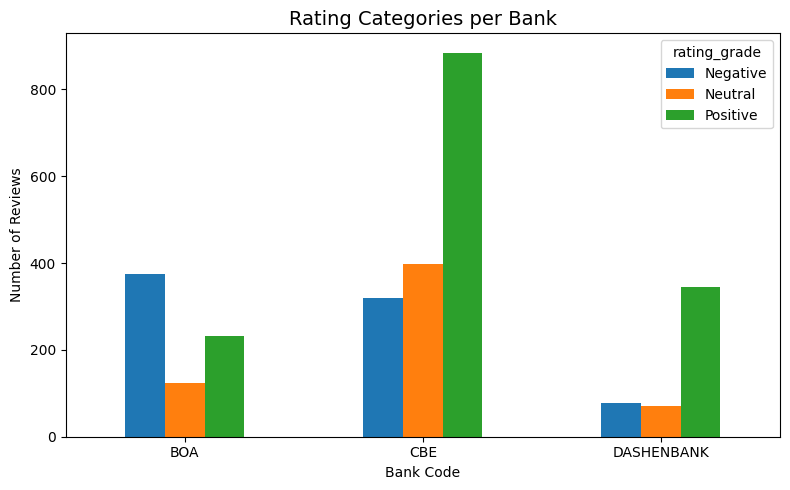

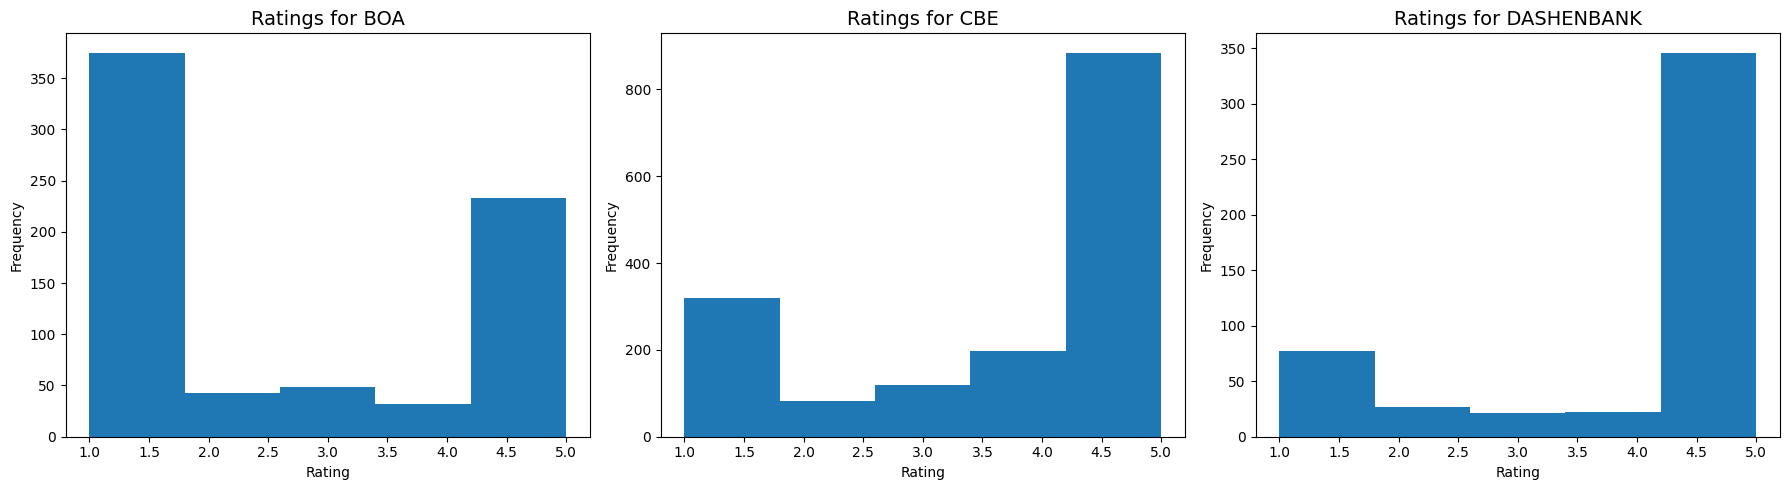

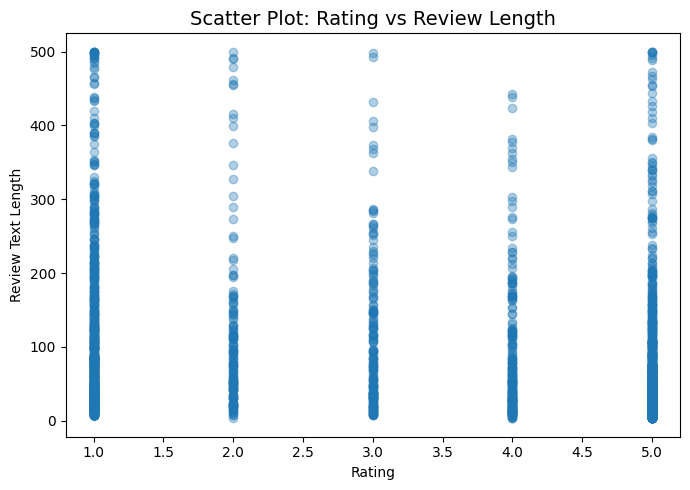

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Load data
# ---------------------------
df = pd.read_csv("../Data/processed/cleaned_reviews_reduced.csv")

# ---------------------------
# 2. Grade numeric rating
# ---------------------------
def grade_rating(r):
    if r > 4:
        return "Positive"
    elif r == 4:
        return "Neutral"
    elif r < 2:
        return "Negative"
    else:
        return "Neutral"  # default for rating=2 or 3

df["rating_grade"] = df["rating"].apply(grade_rating)

# ---------------------------
# 3. Count per bank
# ---------------------------
rating_per_bank = df.groupby(["bank_code", "rating_grade"]).size().unstack(fill_value=0)

print("\nRating distribution per bank:")
print(rating_per_bank)

# ============================================================
# 4. VISUALIZATIONS
# ============================================================

# ---------------------------
# BAR GRAPH (per bank)
# ---------------------------
plt.figure(figsize=(8, 5))
rating_per_bank.plot(kind="bar", figsize=(8, 5))

plt.title("Rating Categories per Bank", fontsize=14)
plt.ylabel("Number of Reviews")
plt.xlabel("Bank Code")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ---------------------------
# HISTOGRAMS PER BANK
# ---------------------------

# Get list of banks
banks = df["bank_code"].unique()
banks = sorted(banks)  # optional order: ['BOA', 'CBE', 'DASHENBANK']

# Number of banks
n_banks = len(banks)

plt.figure(figsize=(6 * n_banks, 5))

for i, bank in enumerate(banks, 1):
    bank_df = df[df["bank_code"] == bank]

    plt.subplot(1, n_banks, i)
    plt.hist(bank_df["rating"], bins=5)
    plt.title(f"Ratings for {bank}", fontsize=14)
    plt.xlabel("Rating")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ---------------------------
# SCATTER PLOT (rating vs review length)
# ---------------------------
df["review_length"] = df["review_text"].astype(str).apply(len)

plt.figure(figsize=(7, 5))
plt.scatter(df["rating"], df["review_length"], alpha=0.35)

plt.title("Scatter Plot: Rating vs Review Length", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Review Text Length")
plt.tight_layout()
plt.show()


## Using distilbert-base-uncased-finetuned-sst-2-english to compute sentiment scores


In [3]:
import pandas as pd
from transformers import pipeline

# =============================
# 1. Load cleaned dataset
# =============================
df = pd.read_csv("../Data/processed/cleaned_reviews_reduced.csv")

print(f"Loaded {len(df)} rows")

# =============================
# 2. Load DistilBERT SST-2 model
# =============================
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

# =============================
# 3. Function to classify sentiment
# =============================
def classify_sentiment(text, threshold=0.60):
    if not isinstance(text, str) or text.strip() == "":
        return "neutral", 0.0
    
    result = sentiment_pipeline(text)[0]

    label = result["label"].lower()   # "positive" or "negative"
    score = float(result["score"])    # confidence score

    # Convert to 3-class (positive / negative / neutral)
    if score < threshold:
        final_label = "neutral"
    else:
        final_label = label

    return final_label, score


# =============================
# 4. Apply sentiment model
# =============================
sentiments = df["review_text"].apply(lambda x: classify_sentiment(x))

df["sentiment_label"] = sentiments.apply(lambda x: x[0])
df["sentiment_score"] = sentiments.apply(lambda x: x[1])

print("Sentiment analysis complete!")
print(df[["review_text", "sentiment_label", "sentiment_score"]].head())

# =============================
# 5. Save results
# =============================
output_path = "../Output/cleaned_reviews_with_sentiment.csv"
df.to_csv(output_path, index=False)

print(f"\nSaved sentiment-enhanced dataset to:\n{output_path}")


Loaded 2829 rows


'(ProtocolError('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)), '(Request ID: a65e65f9-1744-4a37-a7be-e47fe7dbc6f2)')' thrown while requesting HEAD https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english/resolve/main/config.json
Retrying in 1s [Retry 1/5].
Device set to use cpu


Sentiment analysis complete!
                                     review_text sentiment_label  \
0  The app makes our life easier. Thank you CBE!        positive   
1                            this app very bad 👎        negative   
2   the most advanced app. but how to stay safe?        negative   
3                               Good application        positive   
4     very good banking service and fast service        positive   

   sentiment_score  
0         0.999696  
1         0.999797  
2         0.956509  
3         0.999855  
4         0.999850  

Saved sentiment-enhanced dataset to:
../Output/cleaned_reviews_with_sentiment.csv


## Split Dataset by Sentiment Label to Positive and Negative 

In [16]:
import pandas as pd

# =============================
# 1. Load sentiment-enhanced dataset
# =============================
df = pd.read_csv("../Output/cleaned_reviews_with_sentiment.csv")

print("Loaded:", len(df), "rows")
print(df["sentiment_label"].value_counts())

# =============================
# 2. Normalize sentiment labels
#    (neutral is grouped under negative)
# =============================
df["sentiment_group"] = df["sentiment_label"].apply(
    lambda x: "positive" if x == "positive" else "negative"
)

print("\nGrouped Sentiments:")
print(df["sentiment_group"].value_counts())

# =============================
# 3. Split datasets
# =============================
positive_df = df[df["sentiment_group"] == "positive"]
negative_df = df[df["sentiment_group"] == "negative"]

# =============================
# 4. Save to new CSV files
# =============================
positive_path = "../Output/positive_reviews.csv"
negative_path = "../Output/negative_reviews.csv"

positive_df.to_csv(positive_path, index=False)
negative_df.to_csv(negative_path, index=False)

print(f"\nSaved {len(positive_df)} positive reviews → {positive_path}")
print(f"Saved {len(negative_df)} negative reviews (includes neutral) → {negative_path}")


Loaded: 2829 rows
sentiment_label
positive    1516
negative    1296
neutral       17
Name: count, dtype: int64

Grouped Sentiments:
sentiment_group
positive    1516
negative    1313
Name: count, dtype: int64

Saved 1516 positive reviews → ../Output/positive_reviews.csv
Saved 1313 negative reviews (includes neutral) → ../Output/negative_reviews.csv


In [17]:
import nltk
nltk.download("punkt", download_dir=r"C:\nltk_data")
nltk.download("stopwords", download_dir=r"C:\nltk_data")
nltk.download('punkt_tab', download_dir=r"C:\nltk_data")
nltk.download('vader_lexicon', download_dir=r"C:\nltk_data")
nltk.download('wordnet', download_dir=r"C:\nltk_data")

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Thematic analysis pipeline for the cleaned and reduced bank csv file

* I am working with the postive_reviews data and the Negative_reviews data and giving them 4 and 3 themes respectively.

In [8]:
# Notebook: thematic_analysis_run.ipynb

import pandas as pd
from Thematic_analysis import ThematicAnalyzer

# ================================
# 1. Load datasets
# ================================
positive_df = pd.read_csv("../output/positive_reviews.csv")
negative_df = pd.read_csv("../output/negative_reviews.csv")

print("Loaded:")
print("Positive reviews:", len(positive_df))
print("Negative reviews:", len(negative_df))


# ================================
# 2. Run thematic analysis (Positive: 4 themes)
# ================================
print("\nRunning thematic analysis for POSITIVE reviews...")

positive_analyzer = ThematicAnalyzer(n_themes=4)
positive_with_themes = positive_analyzer.process(positive_df)

# Rename themes → positivetheme_0 ... positivetheme_3
positive_with_themes["theme"] = positive_with_themes["theme"].apply(
    lambda x: f"positivetheme_{x}"
)

# Save output
positive_out_path = "../output/positive_reviews_with_themes.csv"
positive_with_themes.to_csv(positive_out_path, index=False)

print(f"Saved positive themes → {positive_out_path}")


# ================================
# 3. Run thematic analysis (Negative: 3 themes)
# ================================
print("\nRunning thematic analysis for NEGATIVE reviews...")

negative_analyzer = ThematicAnalyzer(n_themes=3)
negative_with_themes = negative_analyzer.process(negative_df)

# Rename themes → negativetheme_0 ... negativetheme_2
negative_with_themes["theme"] = negative_with_themes["theme"].apply(
    lambda x: f"negativetheme_{x}"
)

# Save output
negative_out_path = "../output/negative_reviews_with_themes.csv"
negative_with_themes.to_csv(negative_out_path, index=False)

print(f"Saved negative themes → {negative_out_path}")


# ================================
# 4. Quick preview
# ================================
print("\nPositive Theme Sample:")
print(positive_with_themes.sample(5))

print("\nNegative Theme Sample:")
print(negative_with_themes.sample(5))


[nltk_data] Error loading punkt: [WinError 10053] An established
[nltk_data]     connection was aborted by the software in your host
[nltk_data]     machine
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Loaded:
Positive reviews: 1516
Negative reviews: 1313

Running thematic analysis for POSITIVE reviews...
Preprocessing review text...
Extracting keywords via TF-IDF...
Clustering into 4 themes per bank...
Thematic analysis complete.
Saved positive themes → ../output/positive_reviews_with_themes.csv

Running thematic analysis for NEGATIVE reviews...
Preprocessing review text...
Extracting keywords via TF-IDF...
Clustering into 3 themes per bank...
Thematic analysis complete.
Saved negative themes → ../output/negative_reviews_with_themes.csv

Positive Theme Sample:
                                            review_text  rating  \
339             That's good,but it deserves security l.       4   
717   Everything is perfect, but the transfer histor...       5   
1149                    It's much better now effoyee...       5   
1078                        good App and user friendly.       4   
1377  Banking, but make it smart. Local solutions, a...       5   

              review_date  

## Inserting my data into postgress using pandas + psycopg2

In [6]:
# Step 0: Import libraries
import pandas as pd
import psycopg2

# --------------------------
# Step 1: Define PostgreSQL connection function2
# --------------------------
def get_connection(dbname="bank_reviews", user="postgres", password="root", host="localhost", port="5433"):
    """
    Returns a PostgreSQL connection and cursor
    """
    try:
        conn = psycopg2.connect(
            dbname=dbname,
            user=user,
            password=password,
            host=host,
            port=port
        )
        cursor = conn.cursor()
        print(f"Connected to {dbname} successfully!")
        return conn, cursor
    except Exception as e:
        print("Error connecting to PostgreSQL:", e)
        return None, None

# --------------------------
# Step 2: Define table creation function
# --------------------------
def create_table(cursor, table_name):
    """
    Creates a reviews table with all necessary columns if it doesn't exist
    """
    query = f"""
    CREATE TABLE IF NOT EXISTS {table_name} (
        review_id SERIAL PRIMARY KEY,
        bank_id VARCHAR(50),
        review_text TEXT,
        rating INT,
        review_date DATE,
        bank_name VARCHAR(50),
        bank_code VARCHAR(50),
        source VARCHAR(50),
        sentiment_label VARCHAR(20),
        sentiment_score FLOAT,
        sentiment_group VARCHAR(20),
        cleaned_text TEXT,
        keywords TEXT,
        theme VARCHAR(100)
    );
    """
    cursor.execute(query)
    print(f"Table '{table_name}' ensured in database.")

# --------------------------
# Step 3: Define CSV insertion function
# --------------------------
def insert_csv_to_table(csv_path, table_name, conn, cursor):
    """
    Inserts data from CSV into the specified table
    """
    df = pd.read_csv(csv_path)
    print(f"CSV loaded from {csv_path}. Number of rows: {len(df)}")
    
    for idx, row in df.iterrows():
        cursor.execute(f"""
            INSERT INTO {table_name} (
                bank_id, review_text, rating, review_date, bank_name,
                bank_code, source, sentiment_label, sentiment_score,
                sentiment_group, cleaned_text, keywords, theme
            )
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            ON CONFLICT DO NOTHING;
        """, (
            row.get('bank_id'),
            row.get('review_text'),
            row.get('rating'),
            row.get('review_date'),
            row.get('bank_name'),
            row.get('bank_code'),
            row.get('source'),
            row.get('sentiment_label'),
            row.get('sentiment_score'),
            row.get('sentiment_group'),
            row.get('cleaned_text'),
            row.get('keywords'),
            row.get('theme')
        ))
    conn.commit()
    print(f"Data inserted into '{table_name}' successfully!")

# --------------------------
# Step 4: Connect to PostgreSQL
# --------------------------
conn, cursor = get_connection()

# --------------------------
# Step 5: Create tables
# --------------------------
create_table(cursor, "positive_reviews_with_themes")
create_table(cursor, "negative_reviews_with_themes")

# --------------------------
# Step 6: Insert CSVs into respective tables
# --------------------------
insert_csv_to_table("../output/positive_reviews_with_themes.csv", "positive_reviews_with_themes", conn, cursor)
insert_csv_to_table("../output/negative_reviews_with_themes.csv", "negative_reviews_with_themes", conn, cursor)

# --------------------------
# Step 7: Verify insertion
# --------------------------
cursor.execute("SELECT * FROM positive_reviews_with_themes LIMIT 5;")
print("Positive reviews sample:")
for row in cursor.fetchall():
    print(row)

cursor.execute("SELECT * FROM negative_reviews_with_themes LIMIT 5;")
print("Negative reviews sample:")
for row in cursor.fetchall():
    print(row)

# --------------------------
# Step 8: Close connection
# --------------------------
cursor.close()
conn.close()
print("Connection closed.")


Connected to bank_reviews successfully!
Table 'positive_reviews_with_themes' ensured in database.
Table 'negative_reviews_with_themes' ensured in database.
CSV loaded from ../output/positive_reviews_with_themes.csv. Number of rows: 1516
Data inserted into 'positive_reviews_with_themes' successfully!
CSV loaded from ../output/negative_reviews_with_themes.csv. Number of rows: 1313
Data inserted into 'negative_reviews_with_themes' successfully!
Positive reviews sample:
(1, None, 'The app makes our life easier. Thank you CBE!', 5, datetime.date(2025, 11, 27), 'Commercial Bank of Ethiopia', 'CBE', 'Google Play Store', 'positive', 0.9996963739395142, 'positive', 'app make life easier thank cbe', 'easier, life, thank, make, cbe', 'positivetheme_Theme_1')
(2, None, 'Good application', 4, datetime.date(2025, 11, 27), 'Commercial Bank of Ethiopia', 'CBE', 'Google Play Store', 'positive', 0.999854564666748, 'positive', 'good application', 'application, good, zat, youve, youre', 'positivetheme_The

## Checking thematically analyzed reviews

In [9]:
print("\nPositive Theme Sample:")
print(positive_with_themes.sample(5))

print("\nNegative Theme Sample:")
print(negative_with_themes.sample(5))


Positive Theme Sample:
                                 review_text  rating          review_date  \
185                     Best and easy to use       5  2025-01-09 16:07:11   
79             i like everything of this app       5  2025-05-27 21:34:01   
718                                      Cbe       5  2022-02-14 14:37:16   
756   This is the best app l used till now .       1  2022-01-05 17:21:23   
1485             Great job my home, my bank.       5  2025-01-16 08:57:21   

                        bank_name   bank_code             source  \
185   Commercial Bank of Ethiopia         CBE  Google Play Store   
79    Commercial Bank of Ethiopia         CBE  Google Play Store   
718   Commercial Bank of Ethiopia         CBE  Google Play Store   
756   Commercial Bank of Ethiopia         CBE  Google Play Store   
1485                  Dashen Bank  DASHENBANK  Google Play Store   

     sentiment_label  sentiment_score sentiment_group          cleaned_text  \
185         positive     

## Extracting keywords in each theme

Loaded:
Positive rows: 1516
Negative rows: 1313


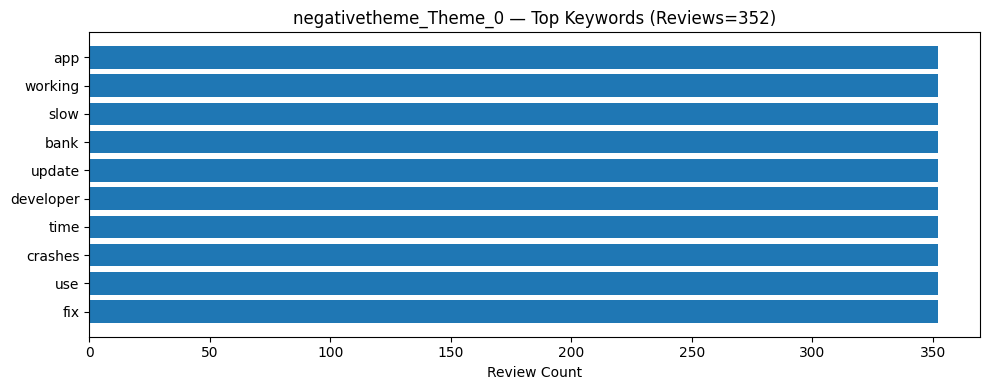

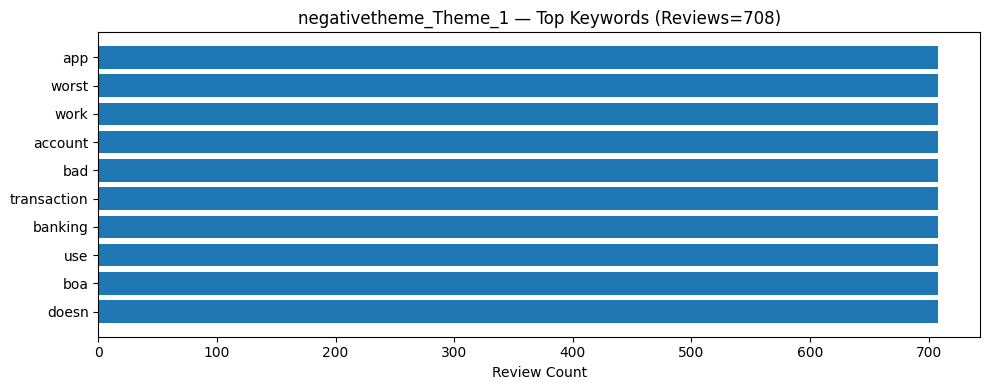

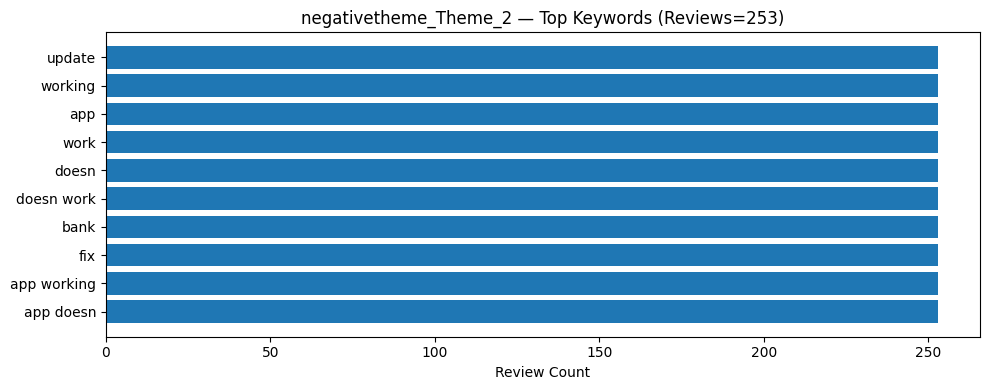

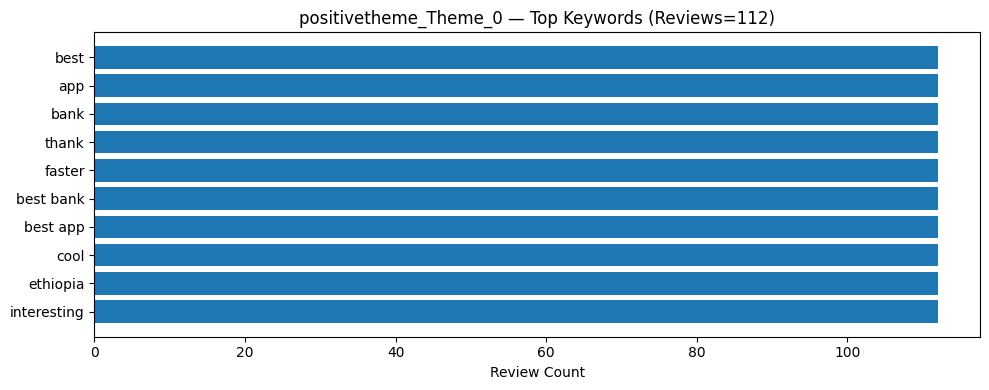

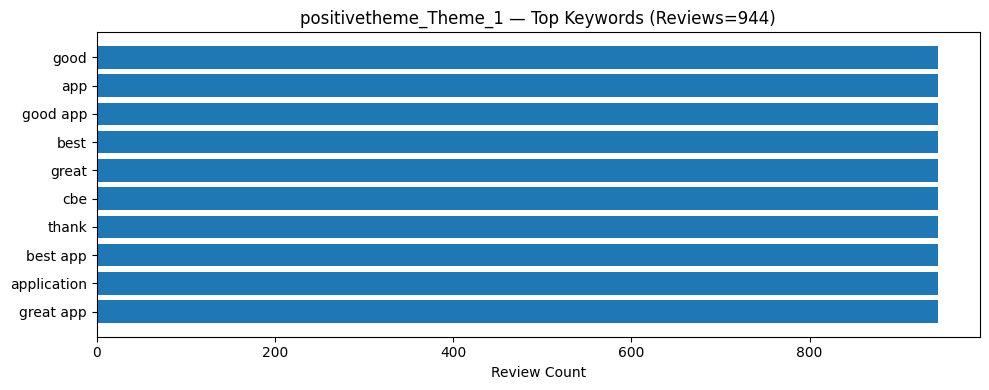

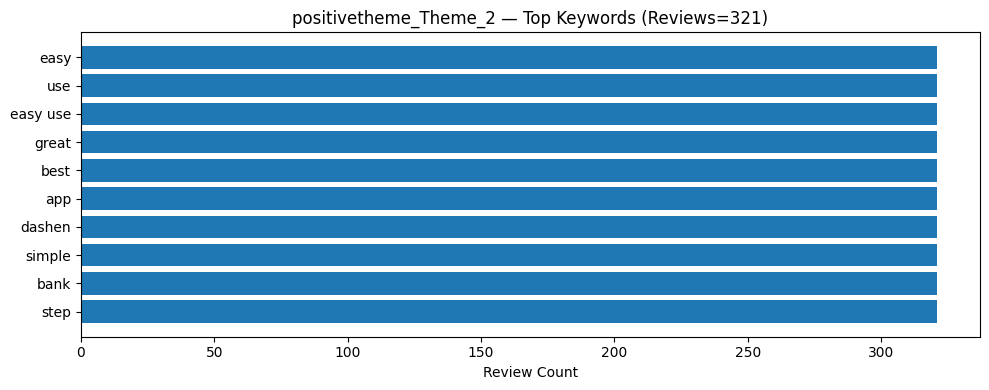

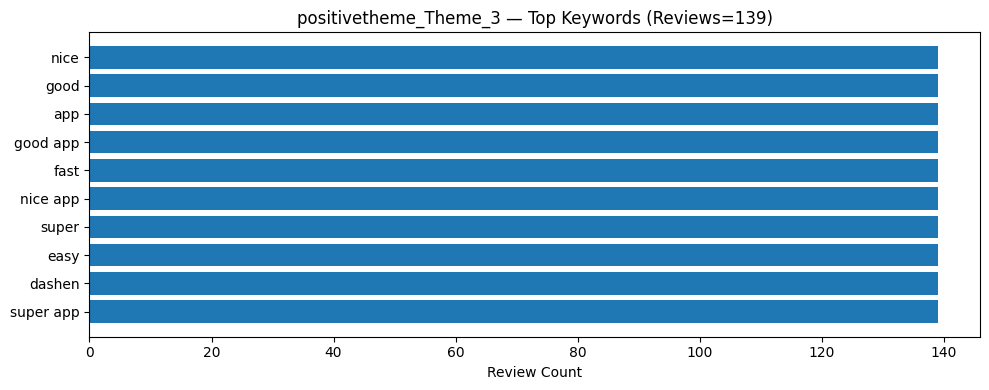

In [5]:
# =========================================================
# 1. IMPORTS
# =========================================================
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt


# =========================================================
# 2. LOAD POSITIVE & NEGATIVE DATASETS
# =========================================================
positive_df = pd.read_csv("../output/positive_reviews_with_themes.csv")
negative_df = pd.read_csv("../output/negative_reviews_with_themes.csv")

print("Loaded:")
print("Positive rows:", len(positive_df))
print("Negative rows:", len(negative_df))

# Combine into single frame (keeps theme names like positivetheme_0)
df = pd.concat([positive_df, negative_df], ignore_index=True)

required_cols = ["review_text", "theme"]
for col in required_cols:
    assert col in df.columns, f"Missing column: {col}"

df["review_text"] = df["review_text"].fillna("")


# =========================================================
# 3. TEXT CLEANING
# =========================================================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df["cleaned_text"] = df["review_text"].apply(clean_text)


# =========================================================
# 4. TF-IDF VECTORIZATION
# =========================================================
vectorizer = TfidfVectorizer(
    max_features=7000,
    min_df=3,
    stop_words="english",
    ngram_range=(1, 2)
)

tfidf_matrix = vectorizer.fit_transform(df["cleaned_text"])
tfidf_matrix = normalize(tfidf_matrix)
feature_names = vectorizer.get_feature_names_out()


# =========================================================
# 5. TOP KEYWORDS PER THEME
# =========================================================
def extract_theme_keywords(df, tfidf_matrix, feature_names, n_terms=10):
    results = {}

    for theme in sorted(df["theme"].unique()):
        mask = (df["theme"] == theme)
        theme_matrix = tfidf_matrix[mask.values]

        if theme_matrix.shape[0] == 0:
            results[theme] = []
            continue

        avg_vec = theme_matrix.mean(axis=0).A1
        top_ids = avg_vec.argsort()[-n_terms:][::-1]

        results[theme] = feature_names[top_ids].tolist()

    return results

theme_keywords = extract_theme_keywords(df, tfidf_matrix, feature_names)
theme_keywords
# =========================================================
# 6. PLOT KEYWORDS FOR EACH THEME
# =========================================================
def plot_theme_keywords(df, theme_keywords):
    for theme, keywords in theme_keywords.items():
        if len(keywords) == 0:
            continue

        count = df[df["theme"] == theme].shape[0]

        plt.figure(figsize=(10, 4))
        plt.barh(keywords, [count] * len(keywords))
        plt.gca().invert_yaxis()

        plt.title(f"{theme} — Top Keywords (Reviews={count})")
        plt.xlabel("Review Count")
        plt.tight_layout()
        plt.show()


plot_theme_keywords(df, theme_keywords)


## Heatmap and Scatter plot of keywords

Scatter Plot → Theme: negativetheme_Theme_0


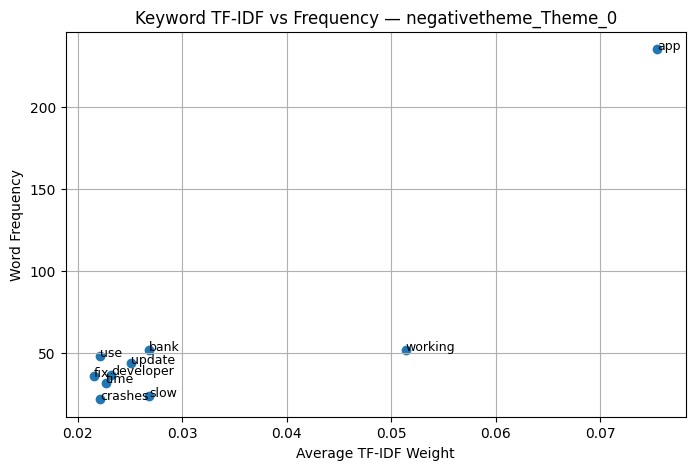

Scatter Plot → Theme: negativetheme_Theme_1


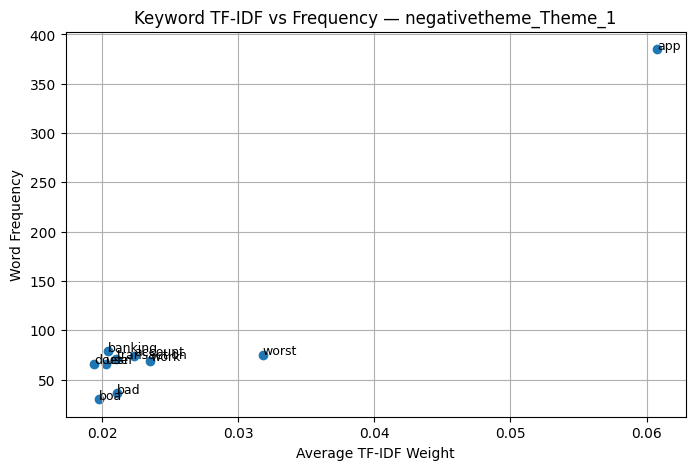

Scatter Plot → Theme: negativetheme_Theme_2


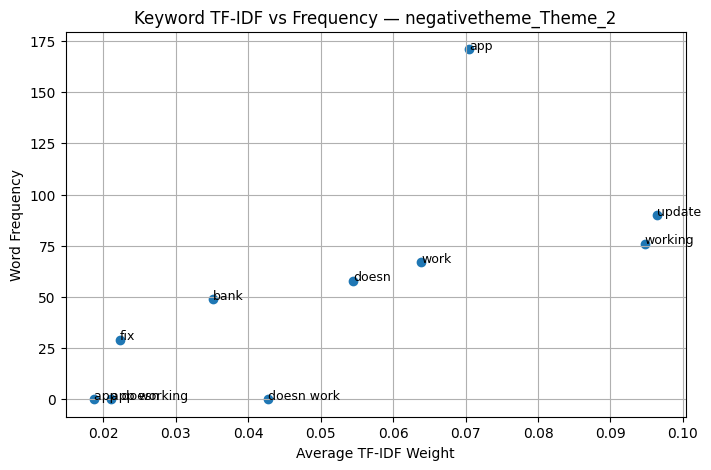

Scatter Plot → Theme: positivetheme_Theme_0


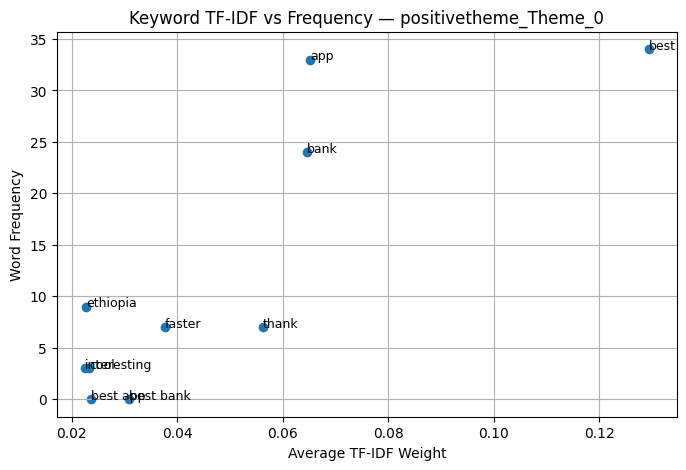

Scatter Plot → Theme: positivetheme_Theme_1


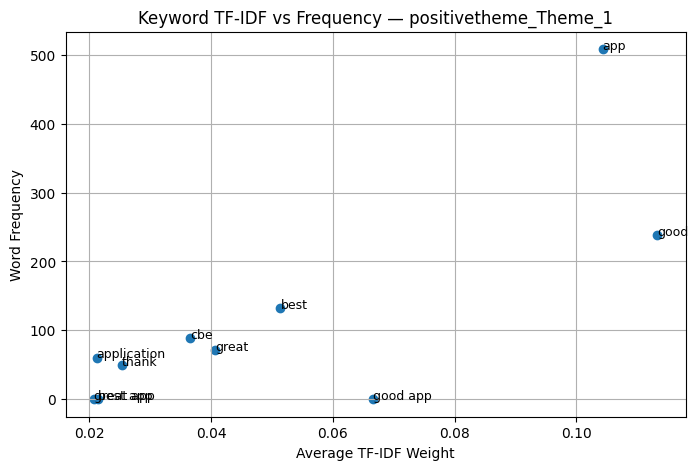

Scatter Plot → Theme: positivetheme_Theme_2


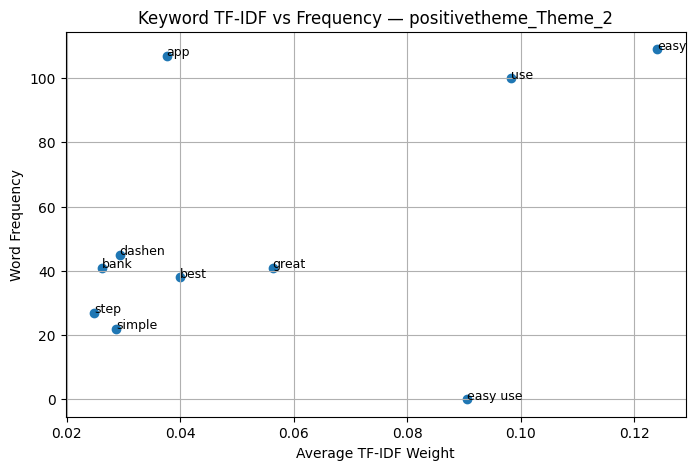

Scatter Plot → Theme: positivetheme_Theme_3


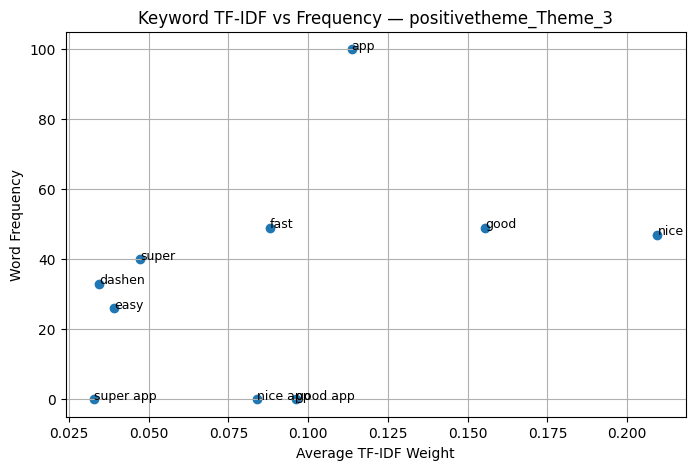

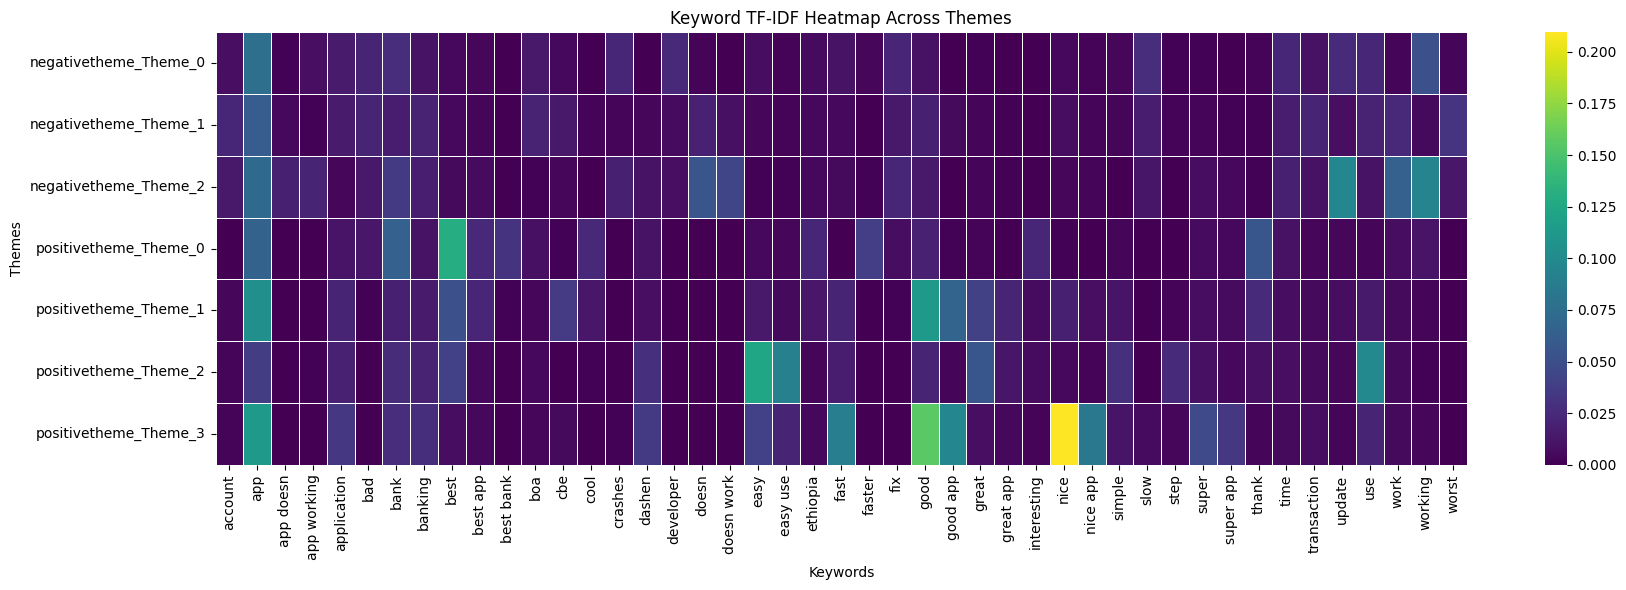

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# =========================================================
# 7. SCATTER PLOT: TF-IDF WEIGHT VS FREQUENCY
# =========================================================
from collections import Counter

def plot_keyword_scatter(df, tfidf_matrix, feature_names, theme_keywords):
    # Convert TF-IDF matrix to dense for easier indexing
    tfidf_dense = tfidf_matrix.toarray()

    for theme, keywords in theme_keywords.items():
        if len(keywords) == 0:
            continue

        print(f"Scatter Plot → Theme: {theme}")

        # Filter rows belonging to this theme
        theme_rows = df[df["theme"] == theme].index
        
        # Compute average TF-IDF weights for only the selected keywords
        avg_tfidf = tfidf_dense[theme_rows].mean(axis=0)

        # Word frequency in raw text
        all_words = " ".join(df.loc[theme_rows, "cleaned_text"]).split()
        word_freq = Counter(all_words)

        x_vals = []
        y_vals = []
        labels = []

        for kw in keywords:
            if kw in feature_names:
                idx = list(feature_names).index(kw)

                x_vals.append(avg_tfidf[idx])      # TF-IDF weight
                y_vals.append(word_freq.get(kw, 0)) # Raw frequency
                labels.append(kw)

        # Plot
        plt.figure(figsize=(8, 5))
        plt.scatter(x_vals, y_vals)

        # Add labels
        for i, kw in enumerate(labels):
            plt.text(x_vals[i], y_vals[i], kw, fontsize=9)

        plt.title(f"Keyword TF-IDF vs Frequency — {theme}")
        plt.xlabel("Average TF-IDF Weight")
        plt.ylabel("Word Frequency")
        plt.grid(True)
        plt.show()


plot_keyword_scatter(df, tfidf_matrix, feature_names, theme_keywords)


# =========================================================
# 8. HEATMAP OF KEYWORD IMPORTANCE FOR EACH THEME
# =========================================================
import seaborn as sns

def plot_keyword_heatmap(df, tfidf_matrix, feature_names, theme_keywords):
    # Convert TF-IDF matrix to dense format
    tfidf_dense = tfidf_matrix.toarray()

    # Build heatmap matrix
    themes = list(theme_keywords.keys())
    
    # Collect all unique keywords
    all_keywords = sorted(set(sum(theme_keywords.values(), [])))

    heatmap_data = []

    for theme in themes:
        theme_rows = df[df["theme"] == theme].index
        avg_tfidf = tfidf_dense[theme_rows].mean(axis=0)

        row = []
        for kw in all_keywords:
            if kw in feature_names:
                idx = list(feature_names).index(kw)
                row.append(avg_tfidf[idx])
            else:
                row.append(0)
        heatmap_data.append(row)

    heatmap_df = pd.DataFrame(heatmap_data, index=themes, columns=all_keywords)

    # Plot
    plt.figure(figsize=(18, 6))
    sns.heatmap(heatmap_df, cmap="viridis", linewidths=0.5)
    plt.title("Keyword TF-IDF Heatmap Across Themes")
    plt.xlabel("Keywords")
    plt.ylabel("Themes")
    plt.tight_layout()
    plt.show()


plot_keyword_heatmap(df, tfidf_matrix, feature_names, theme_keywords)


## Identifying most occuring keywords in each theme per bank

<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1:


--- Generating Keyword Frequency Plot for CBE ---


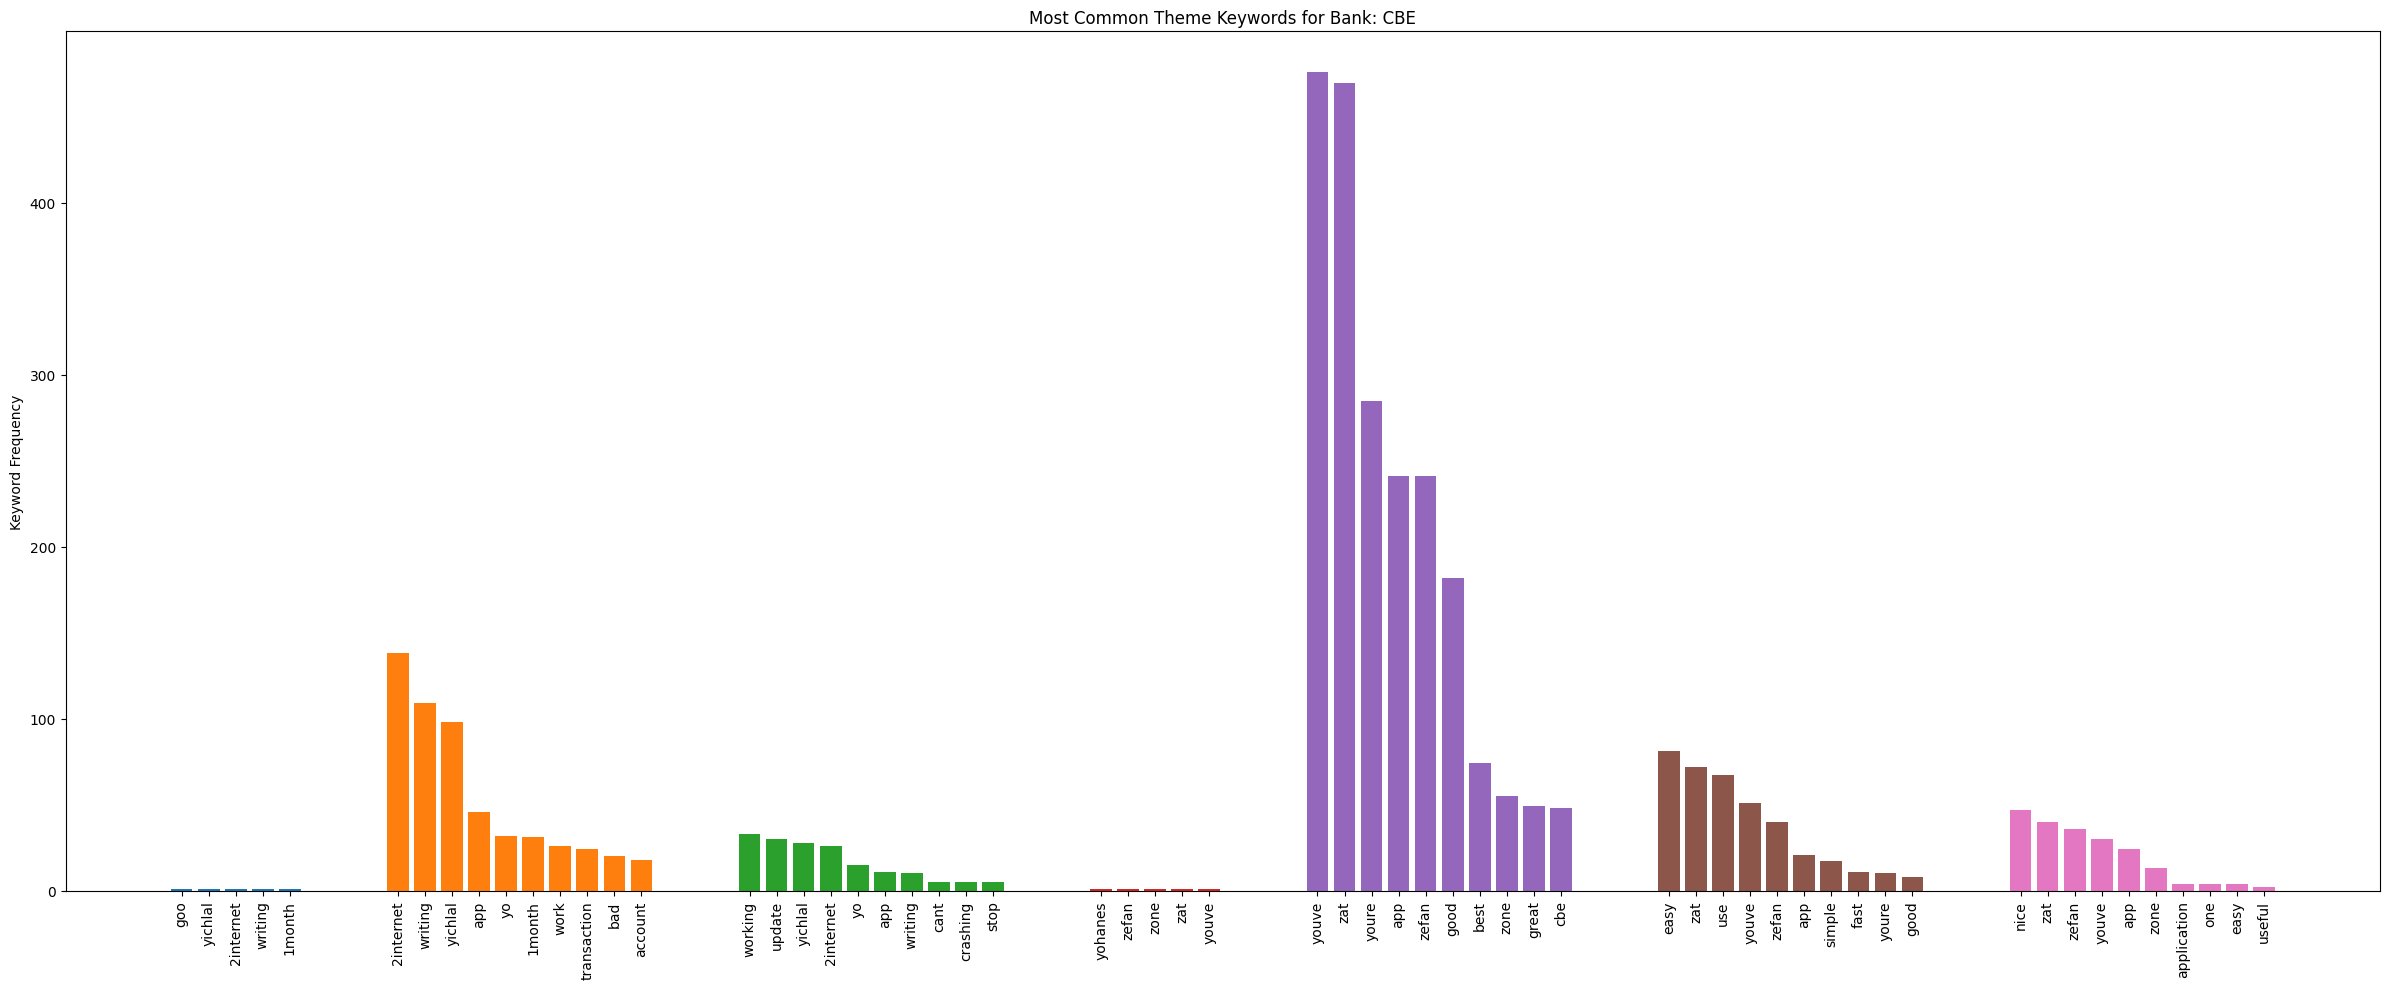


--- Generating Keyword Frequency Plot for BOA ---


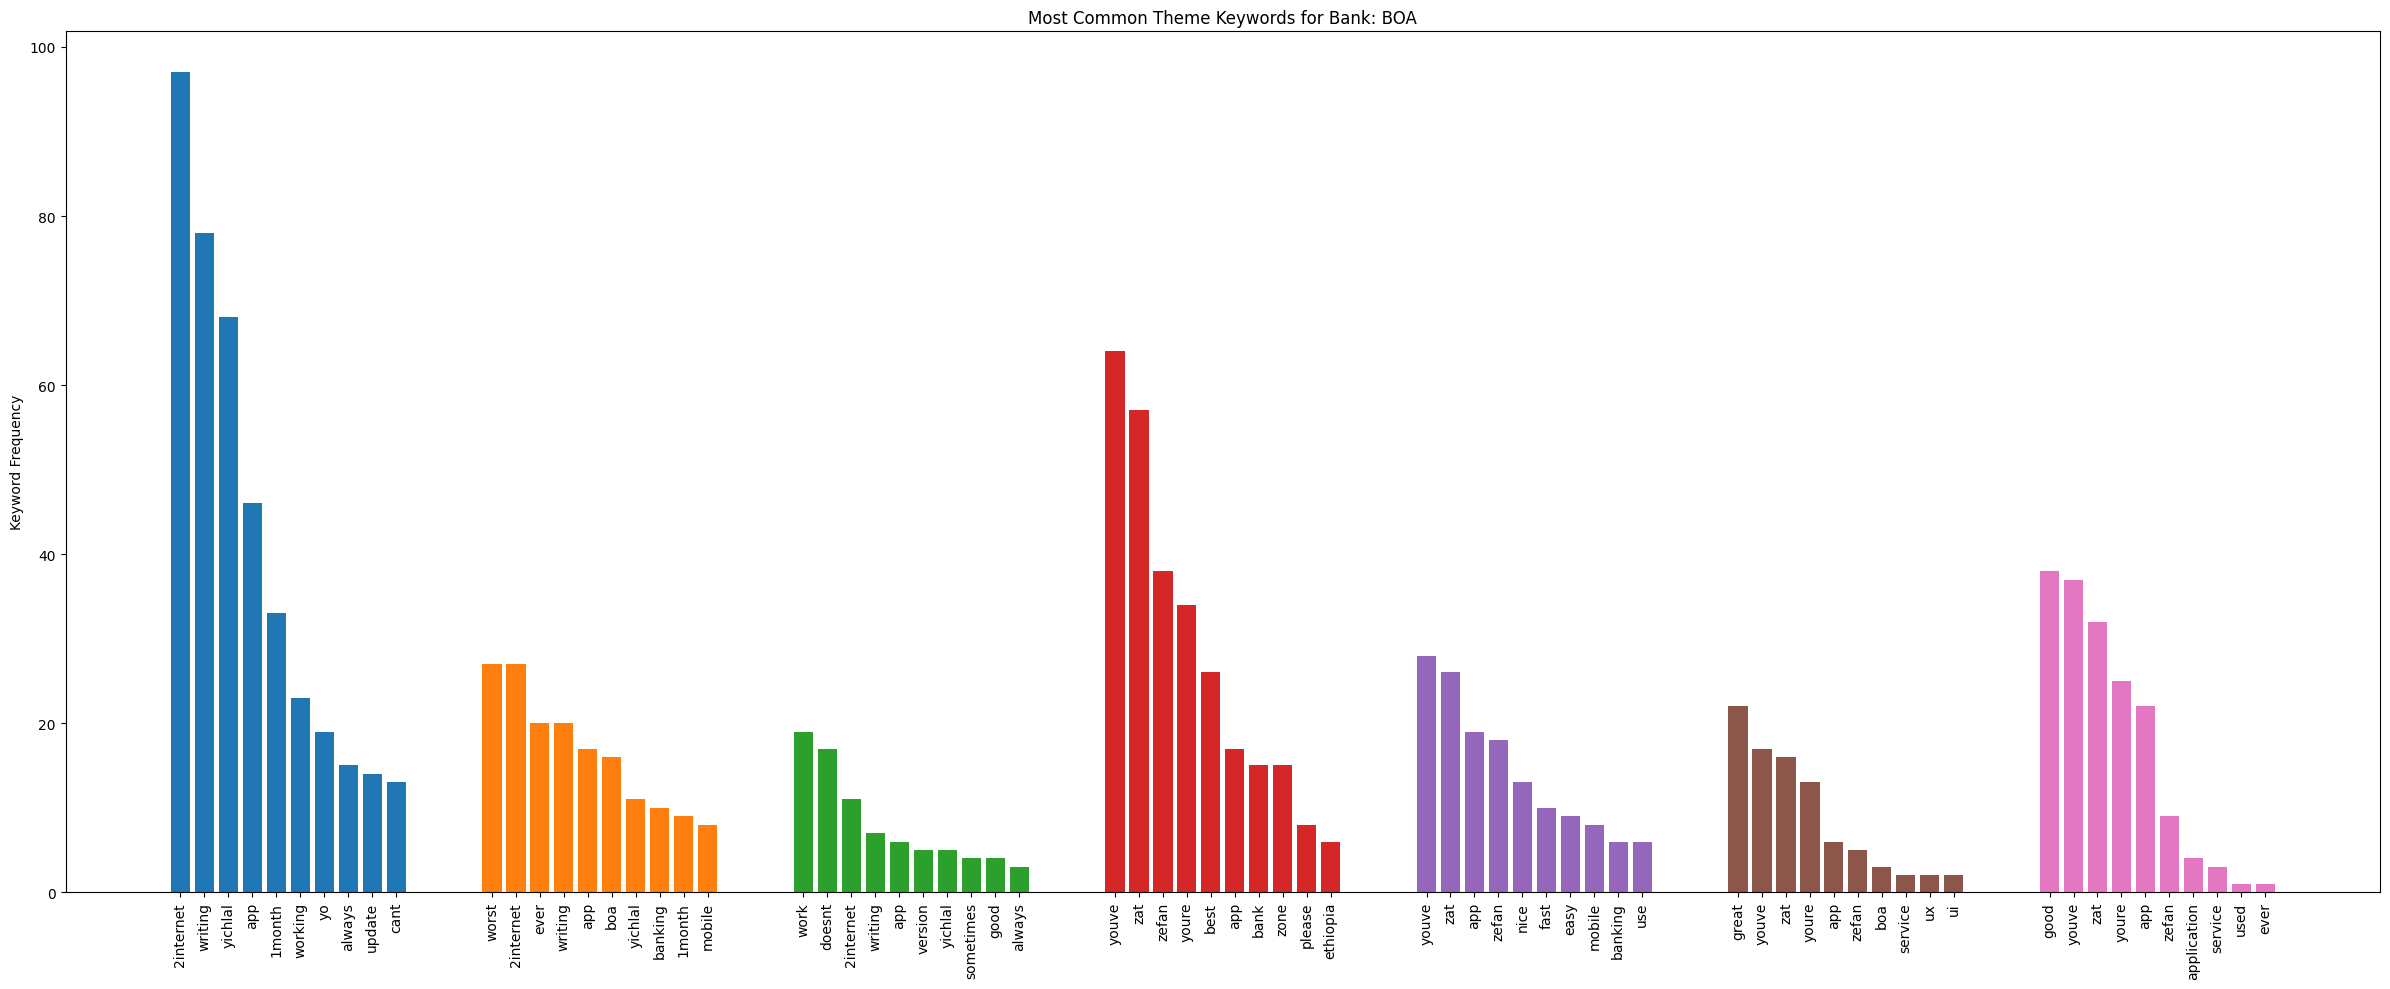


--- Generating Keyword Frequency Plot for DASHENBANK ---


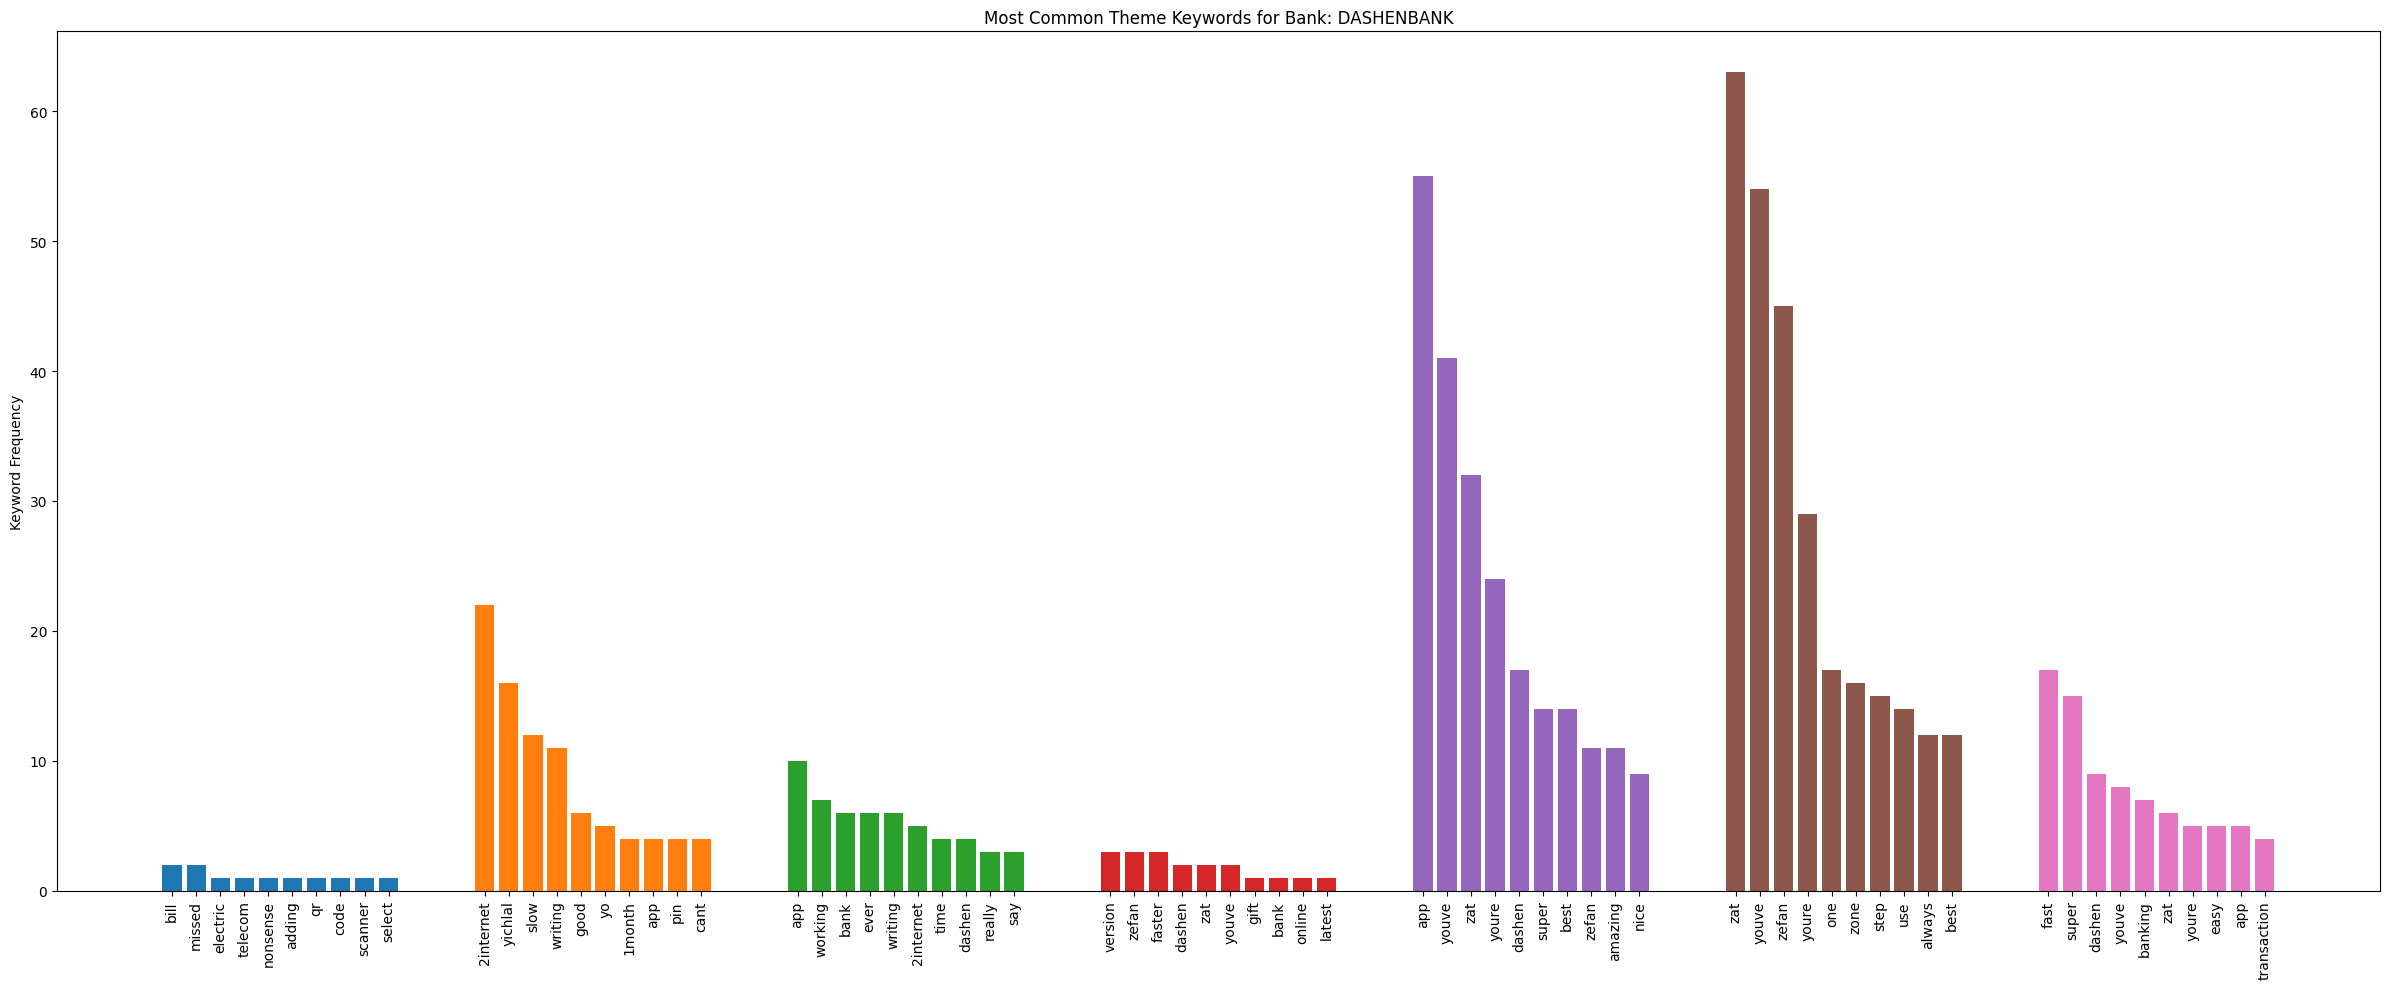

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast
import re

# ============================================================
# 1. LOAD POSITIVE + NEGATIVE THEME FILES
# ============================================================
pos_df = pd.read_csv("../output/positive_reviews_with_themes.csv")
neg_df = pd.read_csv("../output/negative_reviews_with_themes.csv")

pos_df["sentiment_group"] = "positive"
neg_df["sentiment_group"] = "negative"

df = pd.concat([pos_df, neg_df], ignore_index=True)

# ============================================================
# CLEAN TEXT
# ============================================================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    return re.sub(r"\s+", " ", text).strip()

df["cleaned_text"] = df["review_text"].apply(clean_text)

# ============================================================
# PARSE KEYWORDS COLUMN (strings → list)
# ============================================================
def parse_keywords(x):
    if pd.isna(x) or not isinstance(x, str):
        return []
    try:
        return ast.literal_eval(x)  # handles "['a','b']"
    except:
        return [w.strip() for w in x.split(",")]

df["keywords"] = df["keywords"].apply(parse_keywords)

# ============================================================
# THEME ORDER (based on YOUR CSV)
# ============================================================
ordered_themes = [
    "negativetheme_Theme_0",
    "negativetheme_Theme_1",
    "negativetheme_Theme_2",
    "positivetheme_Theme_0",
    "positivetheme_Theme_1",
    "positivetheme_Theme_2",
    "positivetheme_Theme_3"
]

# ============================================================
# COUNT MOST COMMON KEYWORDS PER THEME PER BANK
# ============================================================
def count_keywords_for_bank(df, bank_code, ordered_themes, top_n=10):
    bank_df = df[df["bank_code"] == bank_code]
    final_counts = {}

    for theme in ordered_themes:
        theme_df = bank_df[bank_df["theme"] == theme]

        all_keywords = []
        for lst in theme_df["keywords"]:
            all_keywords.extend(lst)

        counts = Counter(all_keywords)
        final_counts[theme] = dict(counts.most_common(top_n))

    return final_counts

# ============================================================
# PLOT THEMES AS GROUPED BAR CHART
# ============================================================
def plot_bank_keywords(bank_code, keyword_counts):
    plt.figure(figsize=(24, 10))

    x_positions = []
    x_labels = []
    offset = 0

    for theme in ordered_themes:
        kws = list(keyword_counts[theme].keys())
        vals = list(keyword_counts[theme].values())

        xs = [offset + i for i in range(len(kws))]
        plt.bar(xs, vals)

        x_positions.extend(xs)
        x_labels.extend([f"{kw}" for kw in kws])
        
        offset += len(kws) + 3  # space between theme groups

    plt.xticks(x_positions, x_labels, rotation=90)
    plt.ylabel("Keyword Frequency")
    plt.title(f"Most Common Theme Keywords for Bank: {bank_code}")
    plt.tight_layout()
    plt.show()

# ============================================================
# RUN FOR EACH BANK
# ============================================================
banks = ["CBE", "BOA", "DASHENBANK"]

for bank in banks:
    print(f"\n--- Generating Keyword Frequency Plot for {bank} ---")
    keyword_counts = count_keywords_for_bank(df, bank, ordered_themes)
    plot_bank_keywords(bank, keyword_counts)


## Analysis of keywords, Recomendations and visualization

<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1:

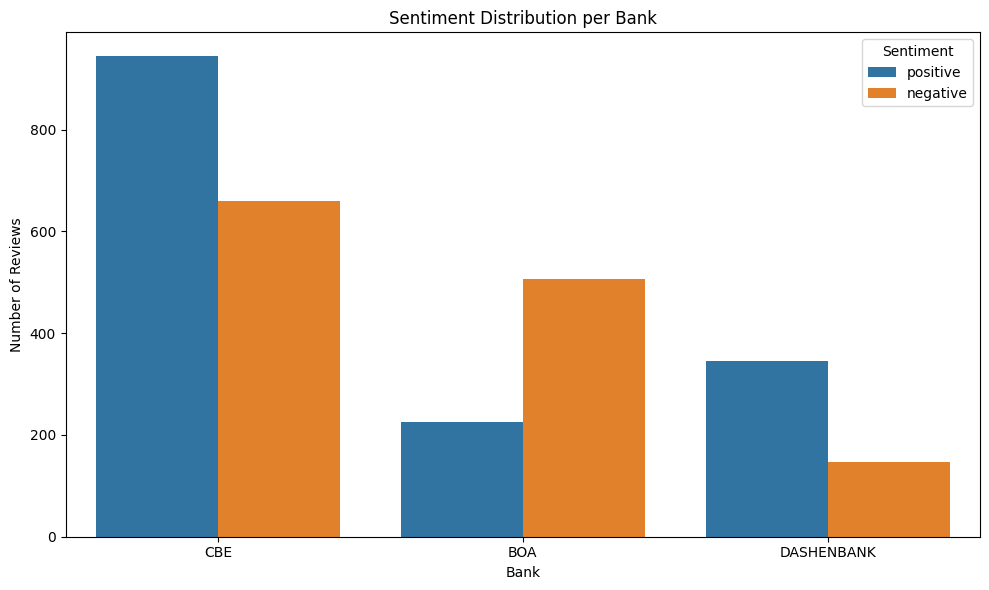

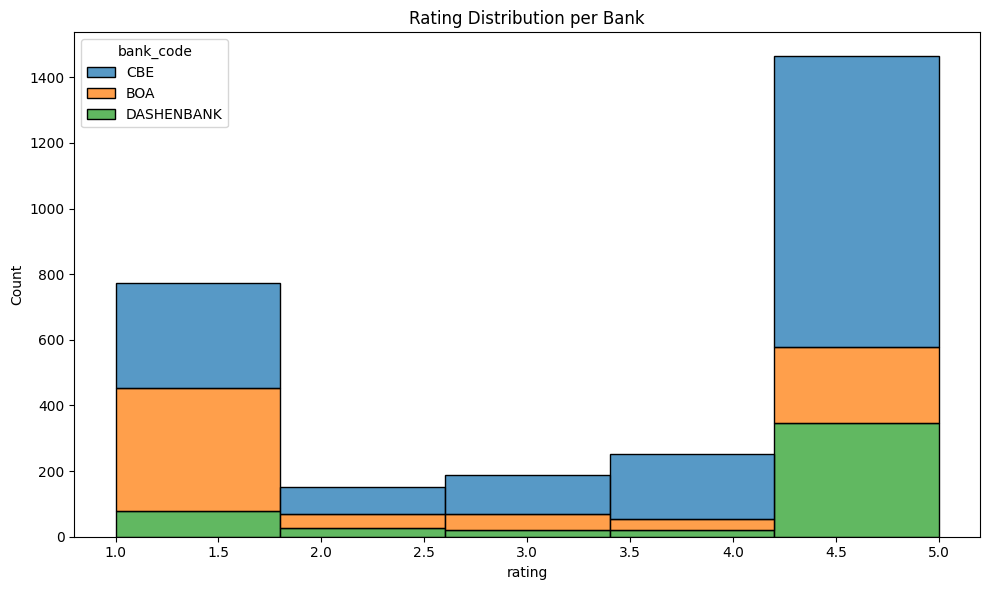

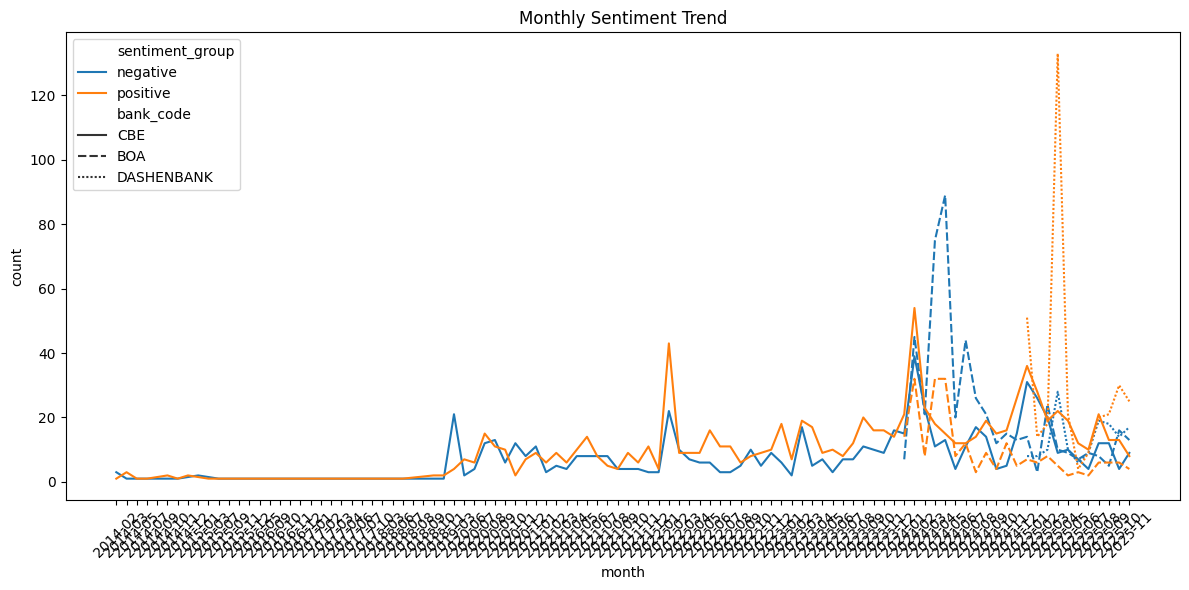


--- CBE ---


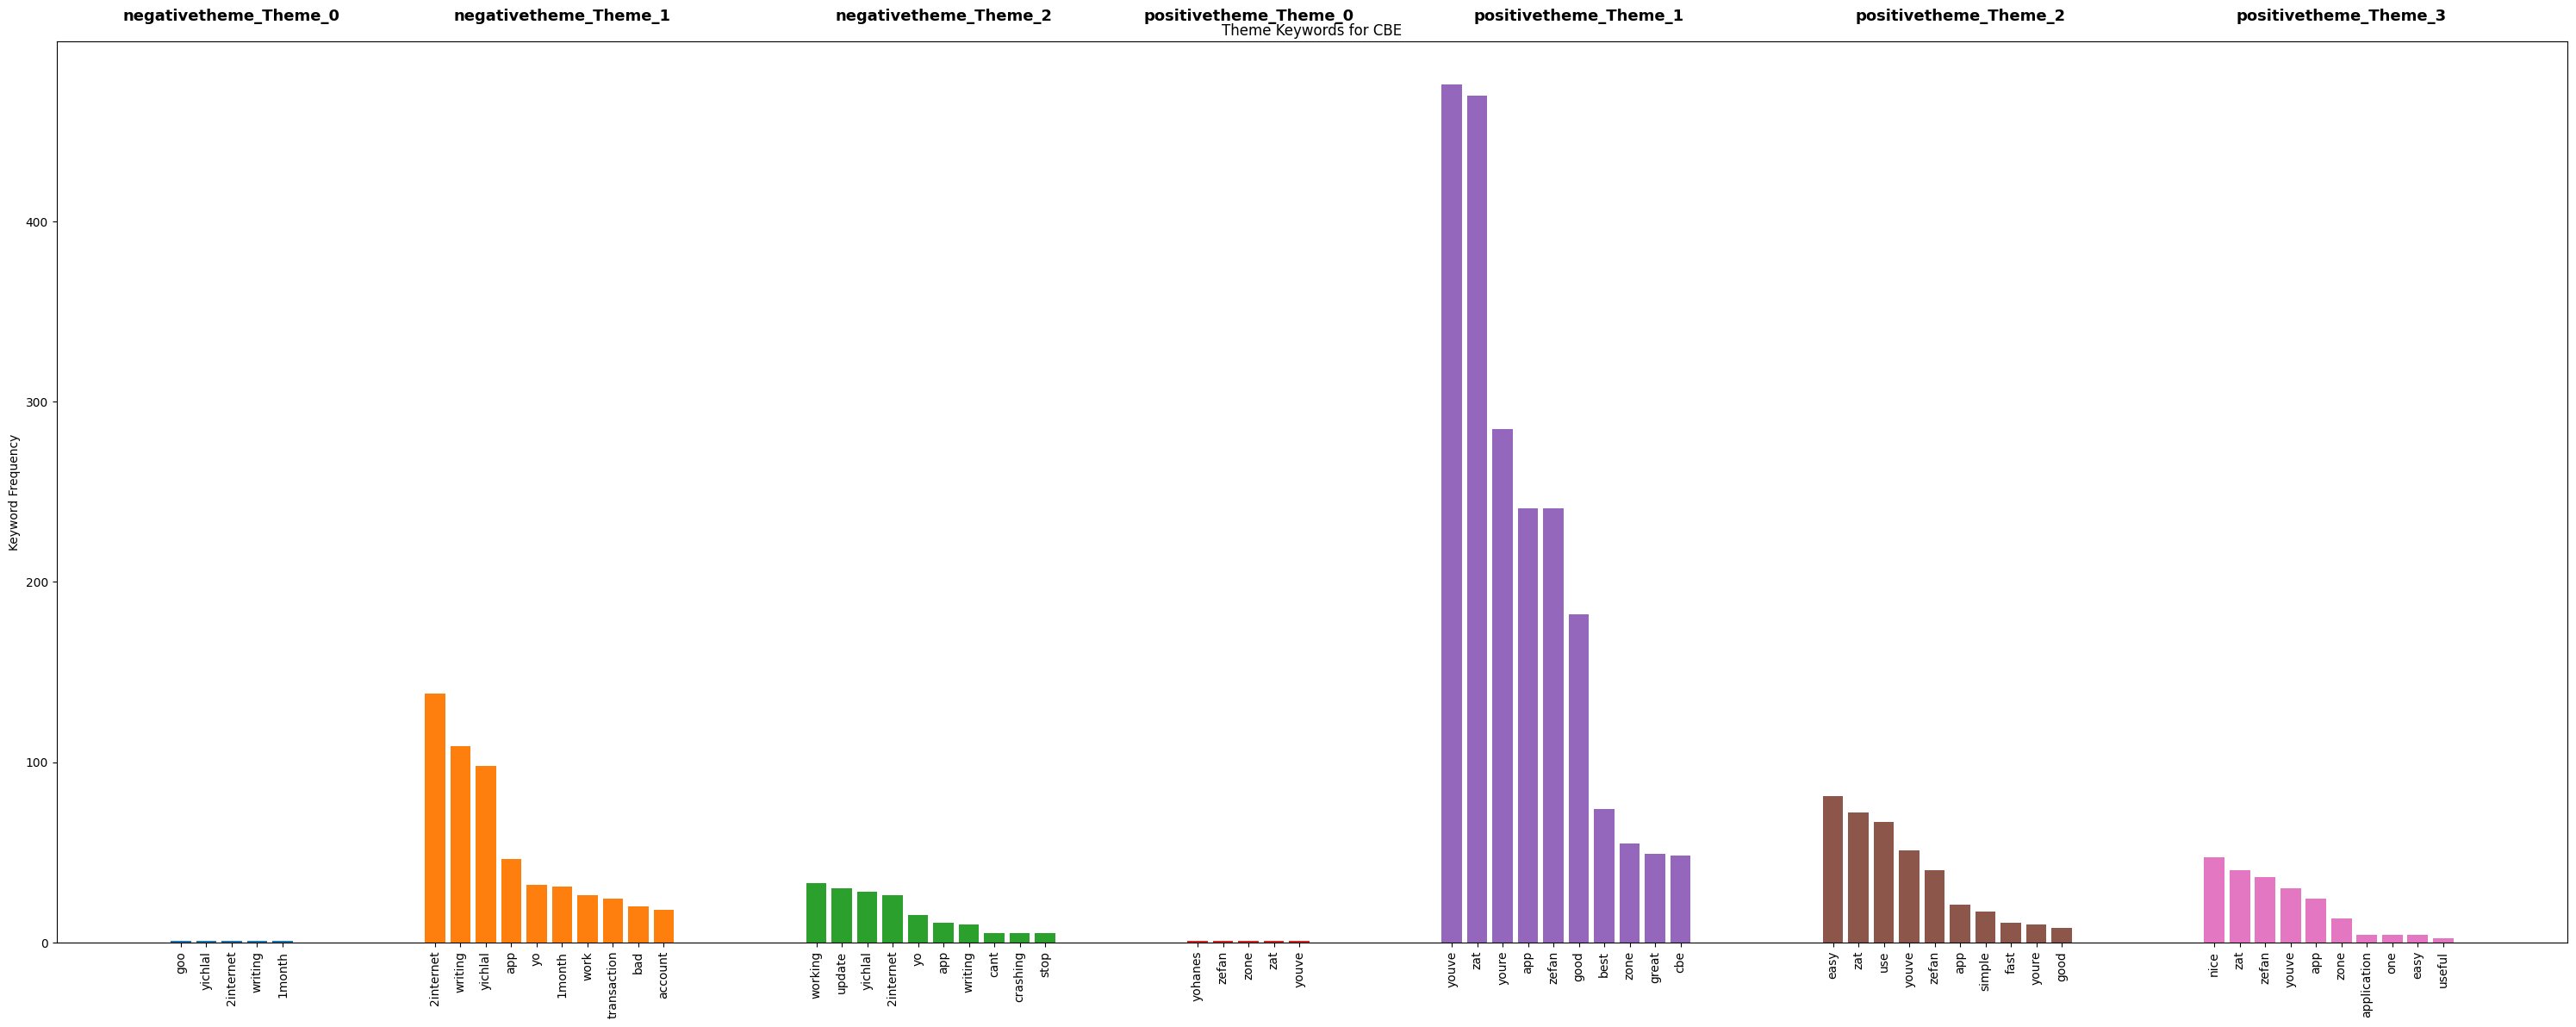


--- BOA ---


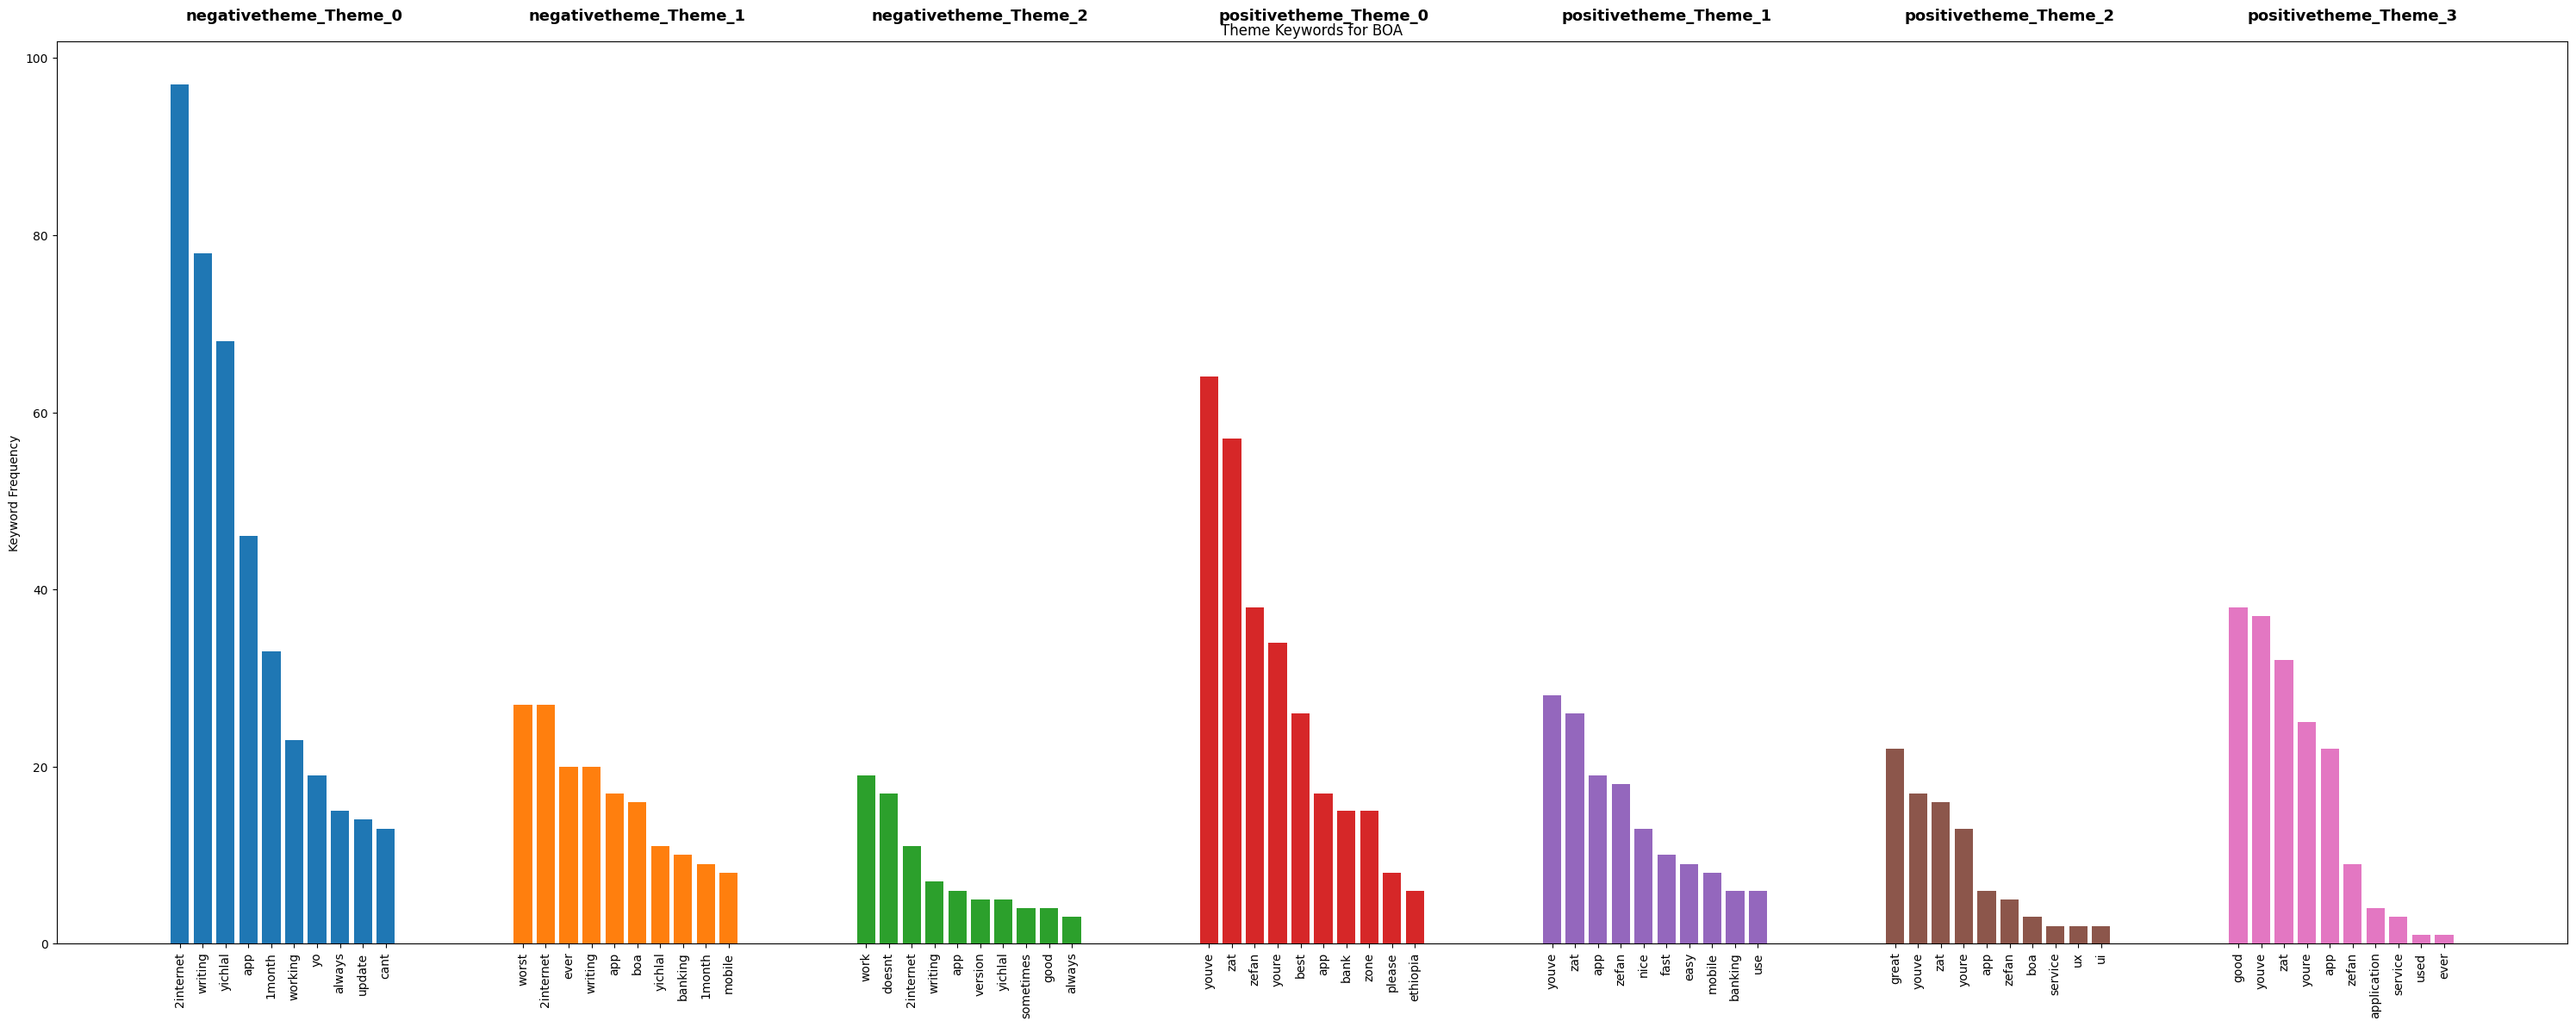


--- DASHENBANK ---


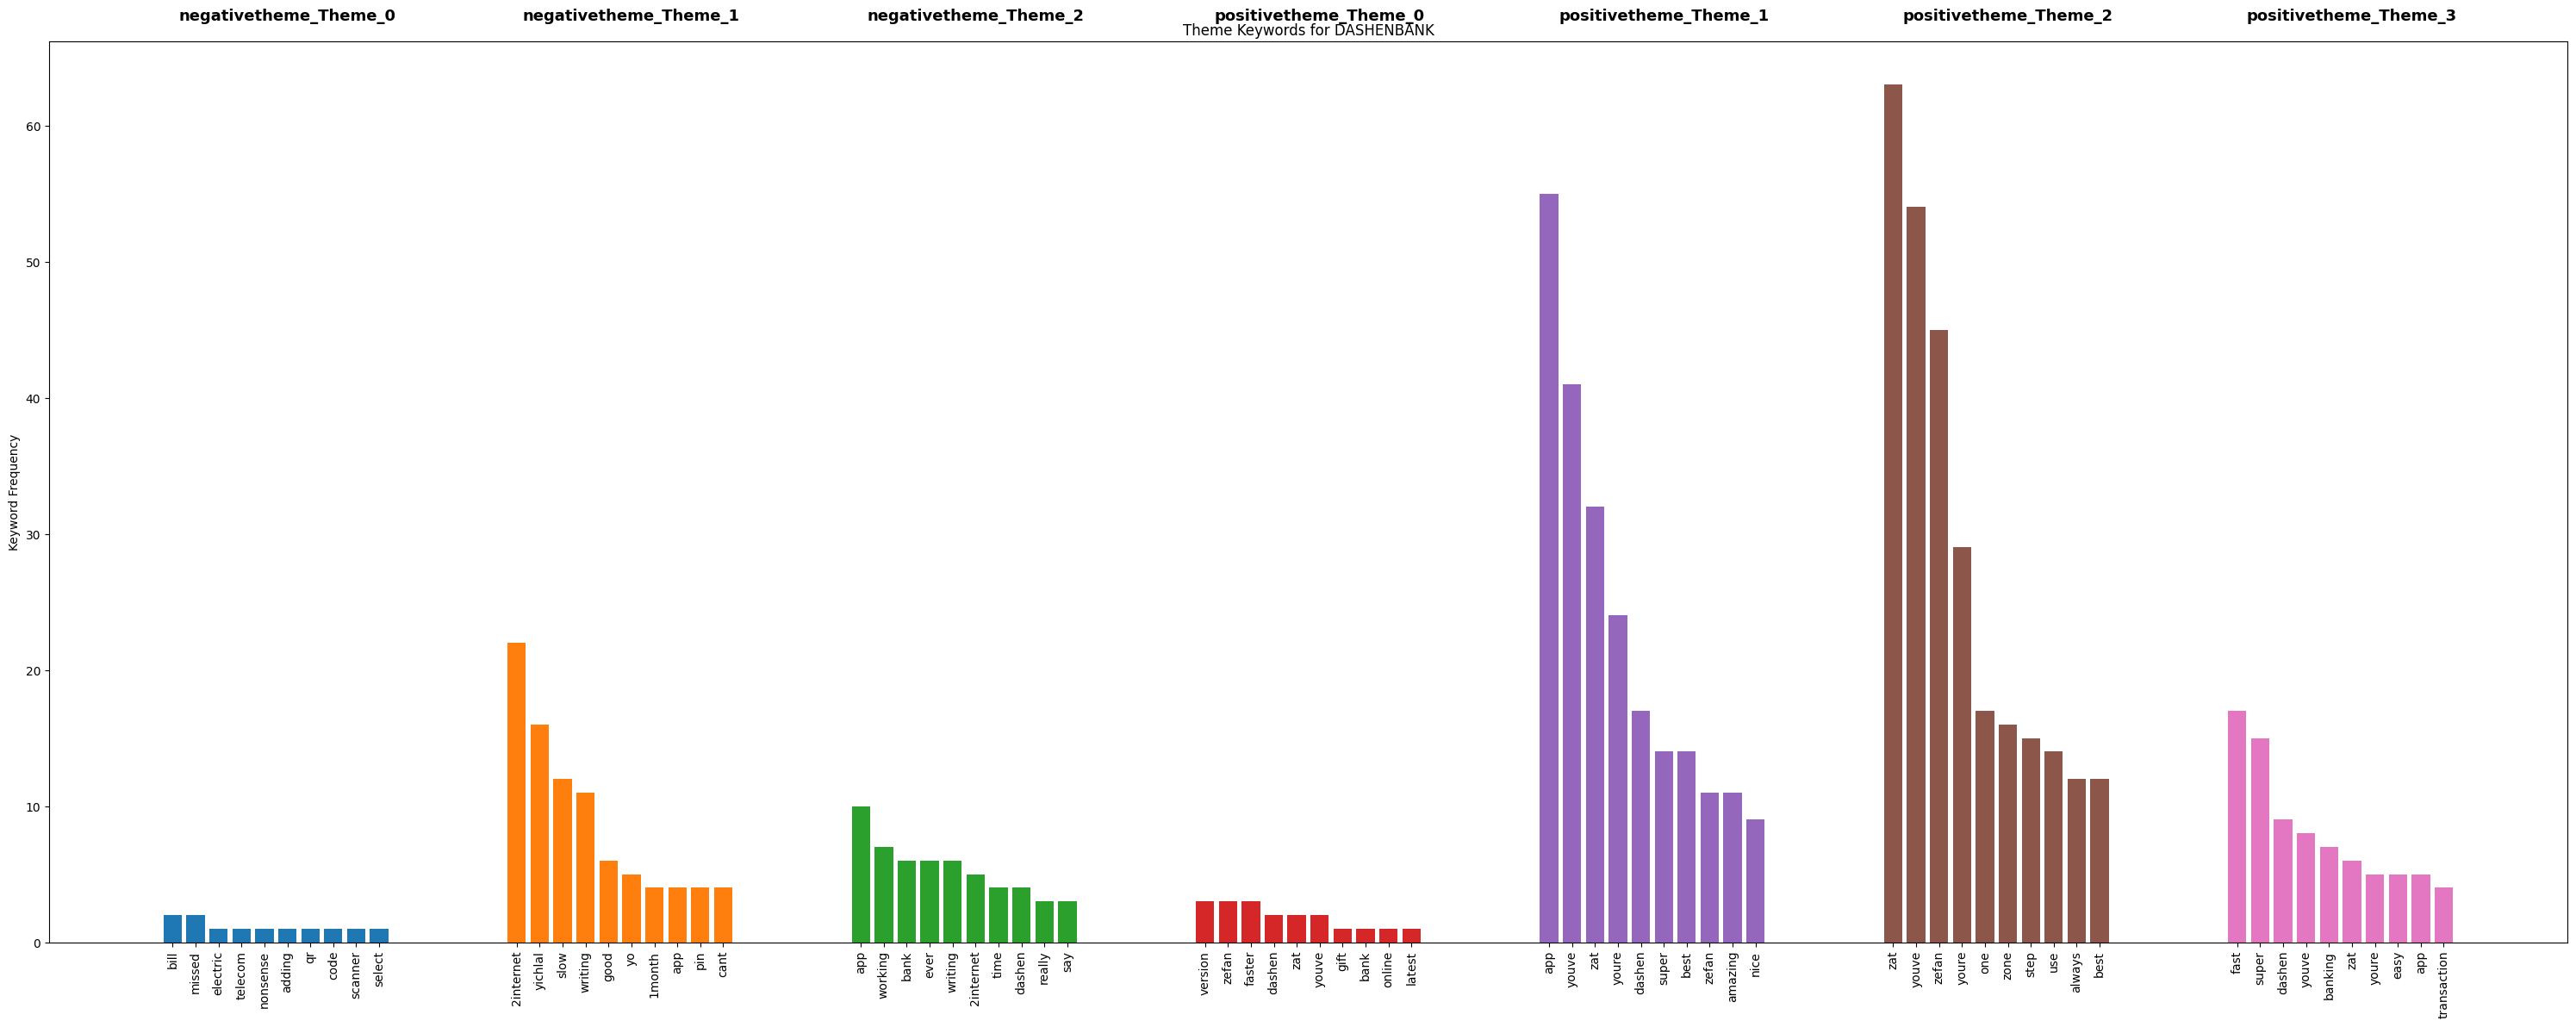

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
import re

!pip install pyecharts

# Pyecharts WordCloud
from pyecharts.charts import WordCloud as PyeWordCloud
from pyecharts import options as opts
from pyecharts.globals import SymbolType

# Utilities to open HTML in browser
import webbrowser
import os

# For counting keywords
from collections import Counter

# ============================================================
# Load your two theme files
pos_df = pd.read_csv("../output/positive_reviews_with_themes.csv")
neg_df = pd.read_csv("../output/negative_reviews_with_themes.csv")

# Add a correct sentiment_group label
pos_df["sentiment_group"] = "positive"
neg_df["sentiment_group"] = "negative"
# Combine into one dataset
df = pd.concat([pos_df, neg_df], ignore_index=True)
# clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    return re.sub(r"\s+", " ", text).strip()

df["cleaned_text"] = df["review_text"].apply(clean_text)

# Parse keywords column (strings → list)
def parse_keywords(x):
    if pd.isna(x) or not isinstance(x, str):
        return []
    try:
        return ast.literal_eval(x)
    except:
        return [w.strip() for w in x.split(",")]
    
df["keywords"] = df["keywords"].apply(parse_keywords)

ordered_themes = [
    "negativetheme_Theme_0",
    "negativetheme_Theme_1",
    "negativetheme_Theme_2",
    "positivetheme_Theme_0",
    "positivetheme_Theme_1",
    "positivetheme_Theme_2",
    "positivetheme_Theme_3"
]
# ============================================================
# Sentiment Distribution per Bank
# ============================================================  
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="bank_code", hue="sentiment_group")
plt.title("Sentiment Distribution per Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()
# ============================================================
# Rating Distribution per Bank  
# ============================================================

score_column = "rating" if "rating" in df.columns else "score"

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=score_column, hue="bank_code",
             multiple="stack", bins=5)
plt.title("Rating Distribution per Bank")
plt.tight_layout()
plt.show()

# ============================================================
# SENTIMENT TREND OVER TIME
# ============================================================

df["review_date"] = pd.to_datetime(df["review_date"])
df["month"] = df["review_date"].dt.to_period("M").astype(str)

monthly = df.groupby(["month", "bank_code", "sentiment_group"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly, x="month", y="count", hue="sentiment_group", style="bank_code")
plt.xticks(rotation=45)
plt.title("Monthly Sentiment Trend")
plt.tight_layout()
plt.show()

# ============================================================
# MOST COMMON KEYWORDS PER THEME — SHOW THEME LABEL ONCE
# ============================================================

def count_keywords_for_bank(df, bank_code, ordered_themes, top_n=10):
    bank_df = df[df["bank_code"] == bank_code]
    final_counts = {}

    for theme in ordered_themes:
        subset = bank_df[bank_df["theme"] == theme]

        all_keywords = []
        for lst in subset["keywords"]:
            all_keywords.extend(lst)

        counts = Counter(all_keywords)
        final_counts[theme] = dict(counts.most_common(top_n))

    return final_counts

def plot_keywords_grouped(bank_code, keyword_counts, ordered_themes):
    plt.figure(figsize=(30, 12))

    x_positions = []
    x_labels = []
    theme_centers = []
    offset = 0

    for theme in ordered_themes:
        kws = list(keyword_counts[theme].keys())
        vals = list(keyword_counts[theme].values())
        
        if not kws:
            continue

        xs = [offset + i for i in range(len(kws))]
        plt.bar(xs, vals)

        x_positions.extend(xs)
        x_labels.extend(kws)

        # Track the center position for theme label
        theme_centers.append((xs[len(xs)//2], theme))

        offset += len(kws) + 5  # space between groups

    plt.xticks(x_positions, x_labels, rotation=90)
    plt.ylabel("Keyword Frequency")
    plt.title(f"Theme Keywords for {bank_code}")

    # Add theme name ONCE per group
    for pos, theme in theme_centers:
        plt.text(pos, plt.ylim()[1] * 1.02, theme,
                 ha="center", va="bottom", fontsize=13, fontweight="bold")

    plt.tight_layout()
    plt.show()

banks = ["CBE", "BOA", "DASHENBANK"]

for bank in banks:
    print(f"\n--- {bank} ---")
    keyword_counts = count_keywords_for_bank(df, bank, ordered_themes)
    plot_keywords_grouped(bank, keyword_counts, ordered_themes)

 # ============================================================
# WORD CLOUDS USING PYECHARTS
# ============================================================

from pyecharts.charts import WordCloud as PyeWordCloud
from pyecharts import options as opts
from pyecharts.globals import SymbolType
import webbrowser
import os

def generate_wordcloud_pyecharts(keywords, title, output_file):
    # Count keyword frequencies
    from collections import Counter
    counts = Counter(keywords)
    data = list(counts.items())  # list of tuples (word, count)
    
    wc = (
        PyeWordCloud()
        .add("", data, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
        .set_global_opts(title_opts=opts.TitleOpts(title=title))
    )
    
    wc.render(output_file)  # generate HTML file
    # automatically open in default browser
    webbrowser.open("file://" + os.path.abspath(output_file))

# Positive keywords
pos_words = df[df["sentiment_group"]=="positive"]["keywords"].explode().dropna().tolist()
generate_wordcloud_pyecharts(pos_words, "Positive Review Keywords", "positive_wordcloud.html")

# Negative keywords
neg_words = df[df["sentiment_group"]=="negative"]["keywords"].explode().dropna().tolist()
generate_wordcloud_pyecharts(neg_words, "Negative Review Keywords", "negative_wordcloud.html")



## visualization using peycharts 

<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1:

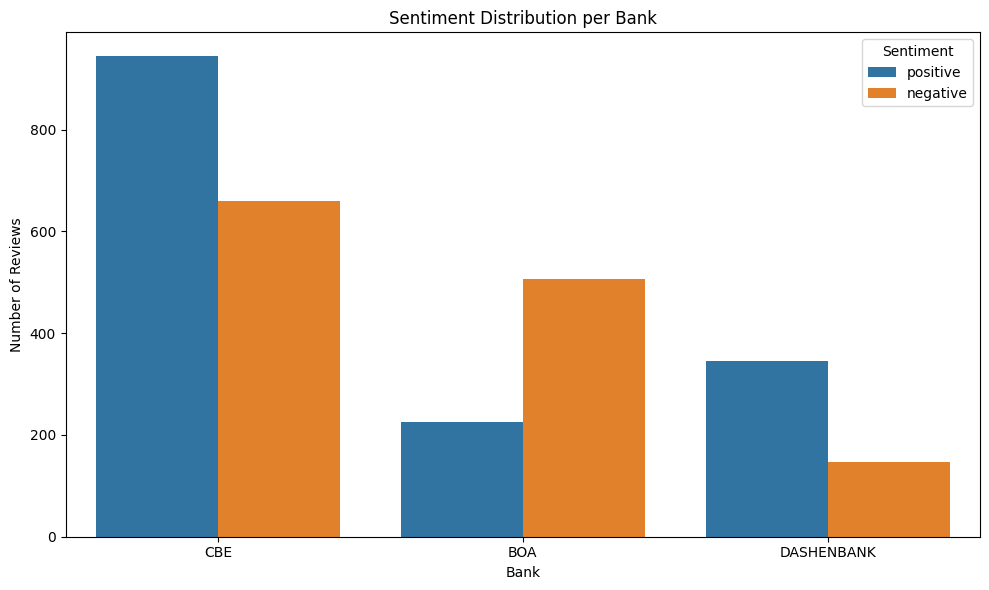

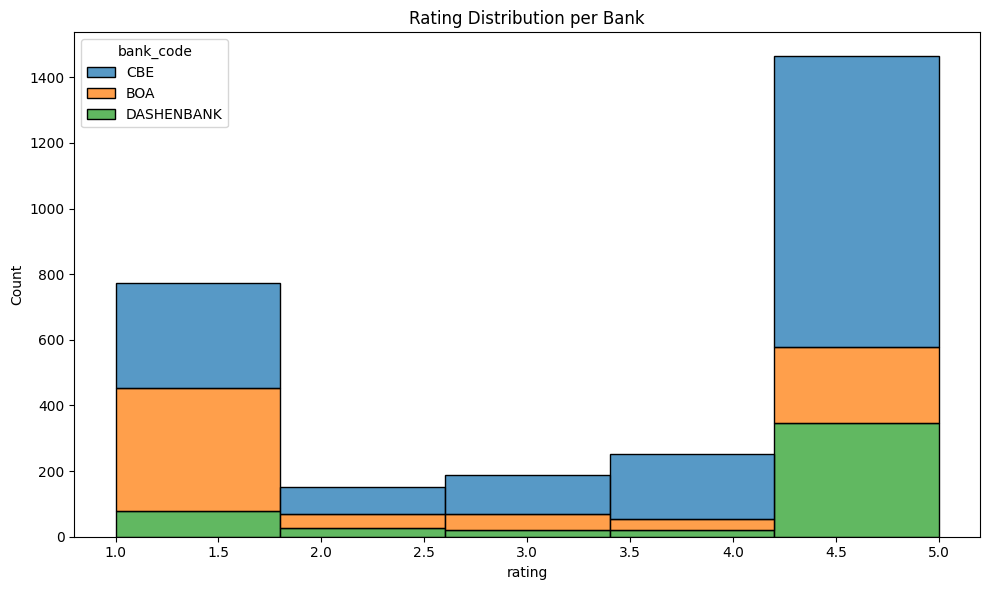

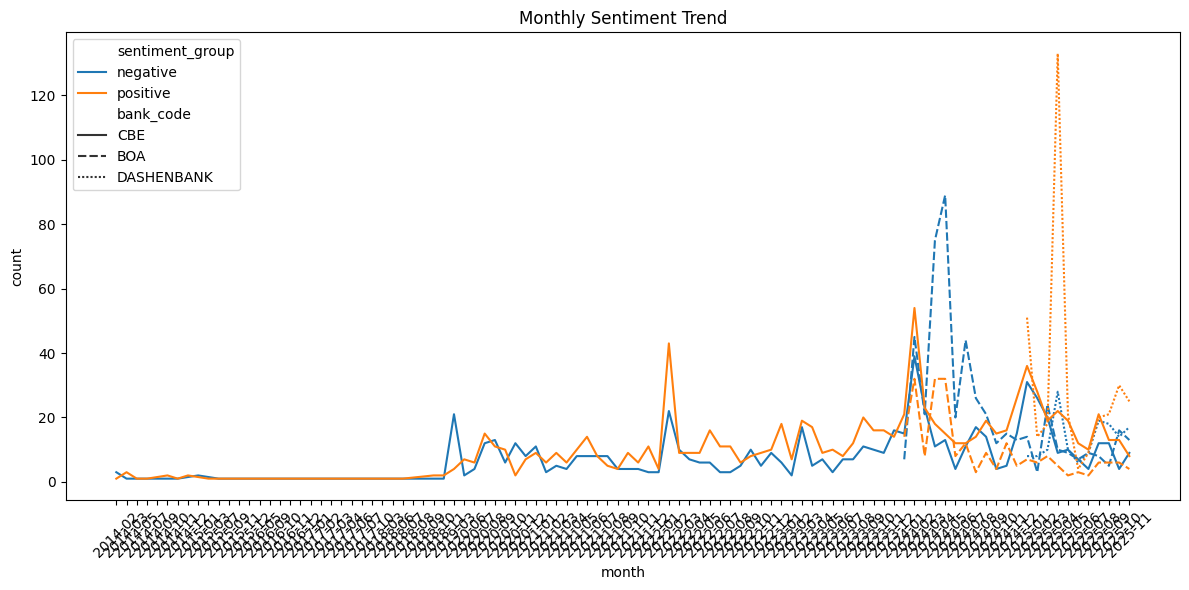


--- CBE ---


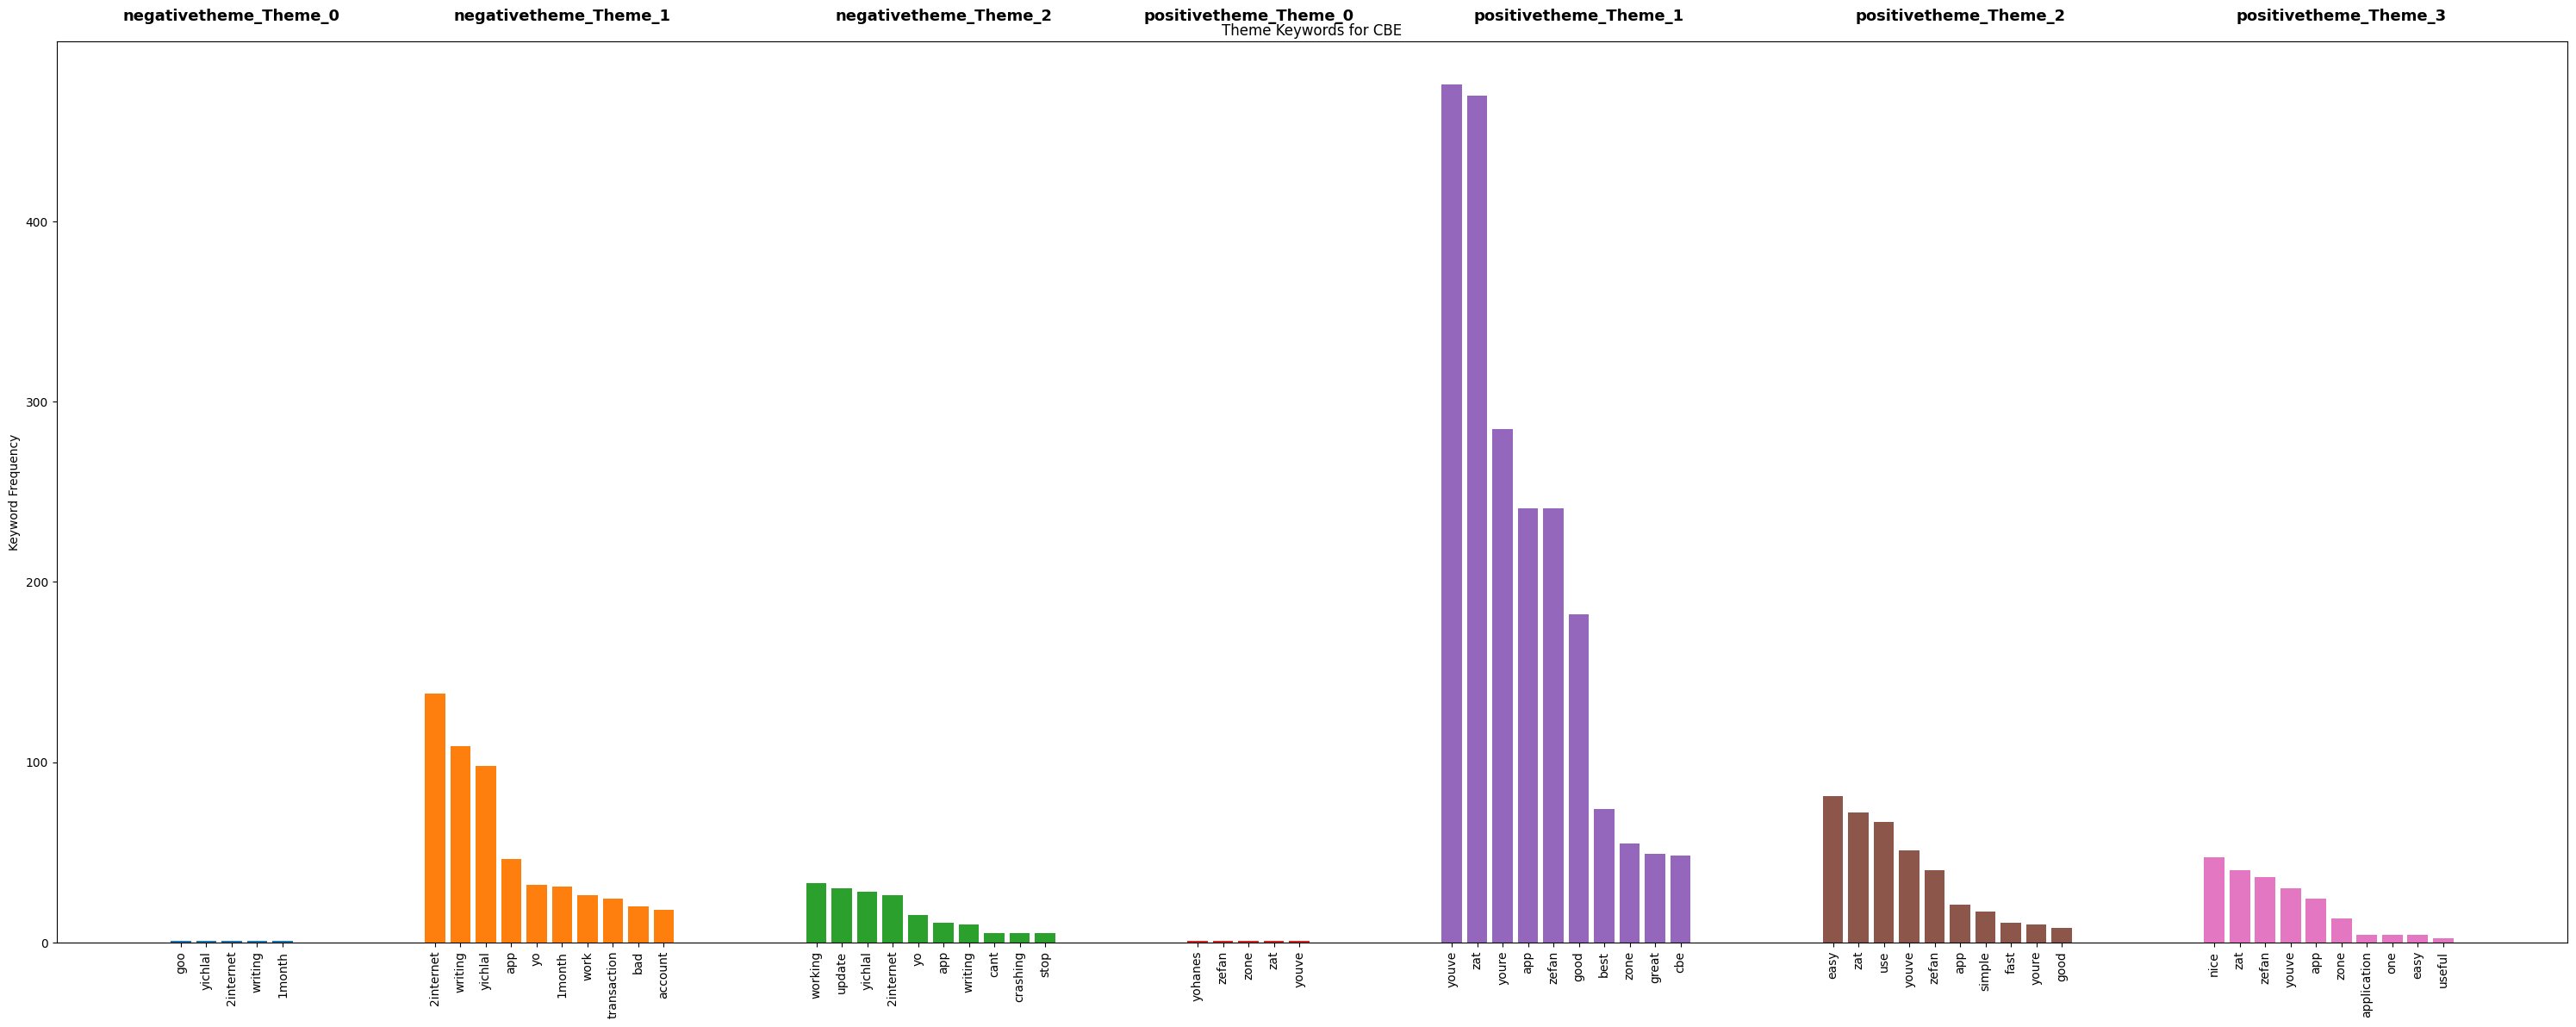


--- BOA ---


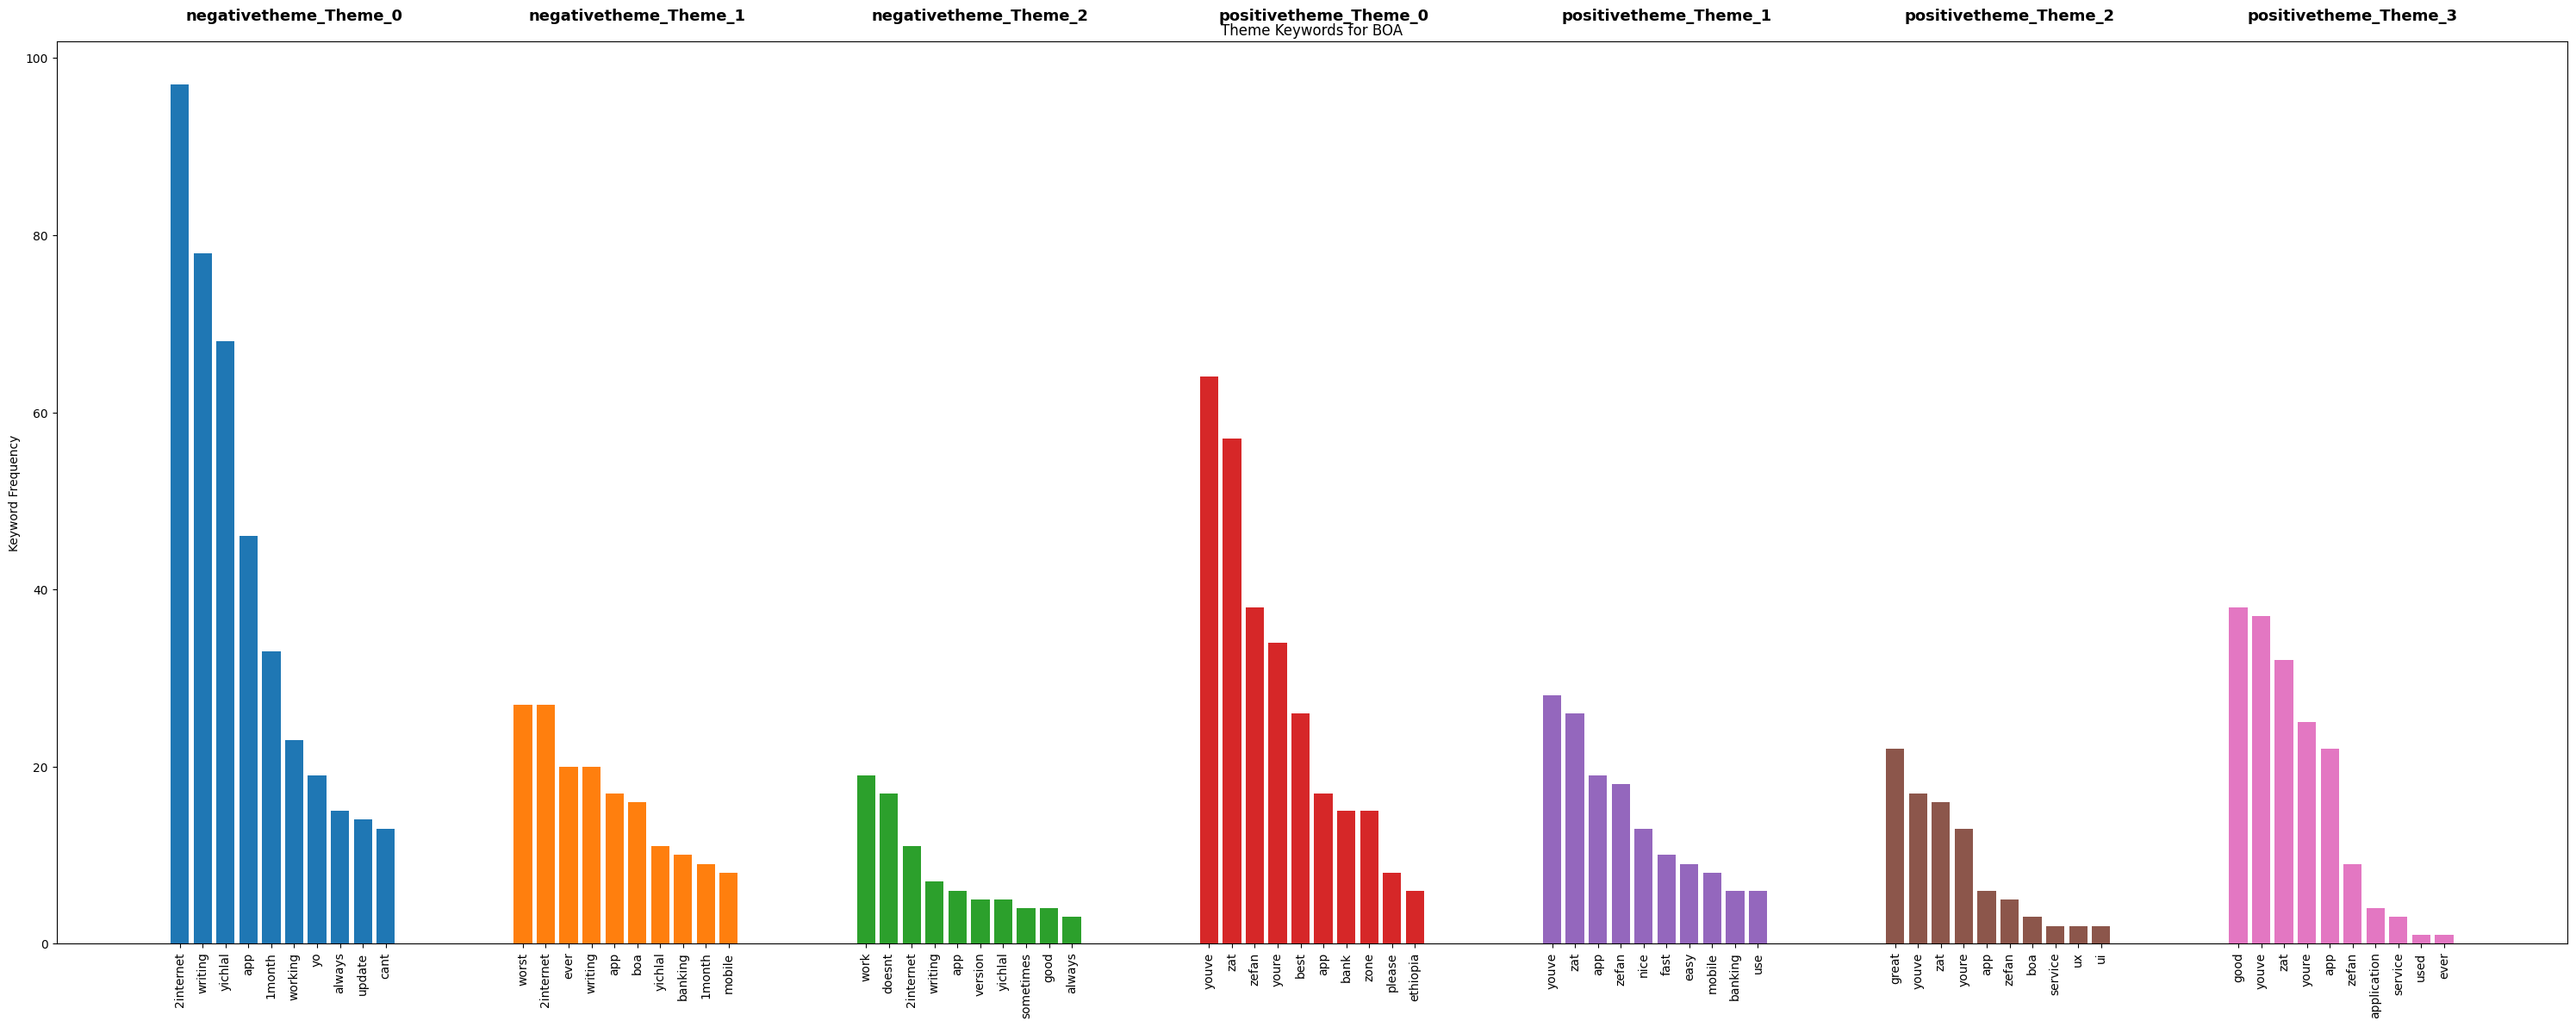


--- DASHENBANK ---


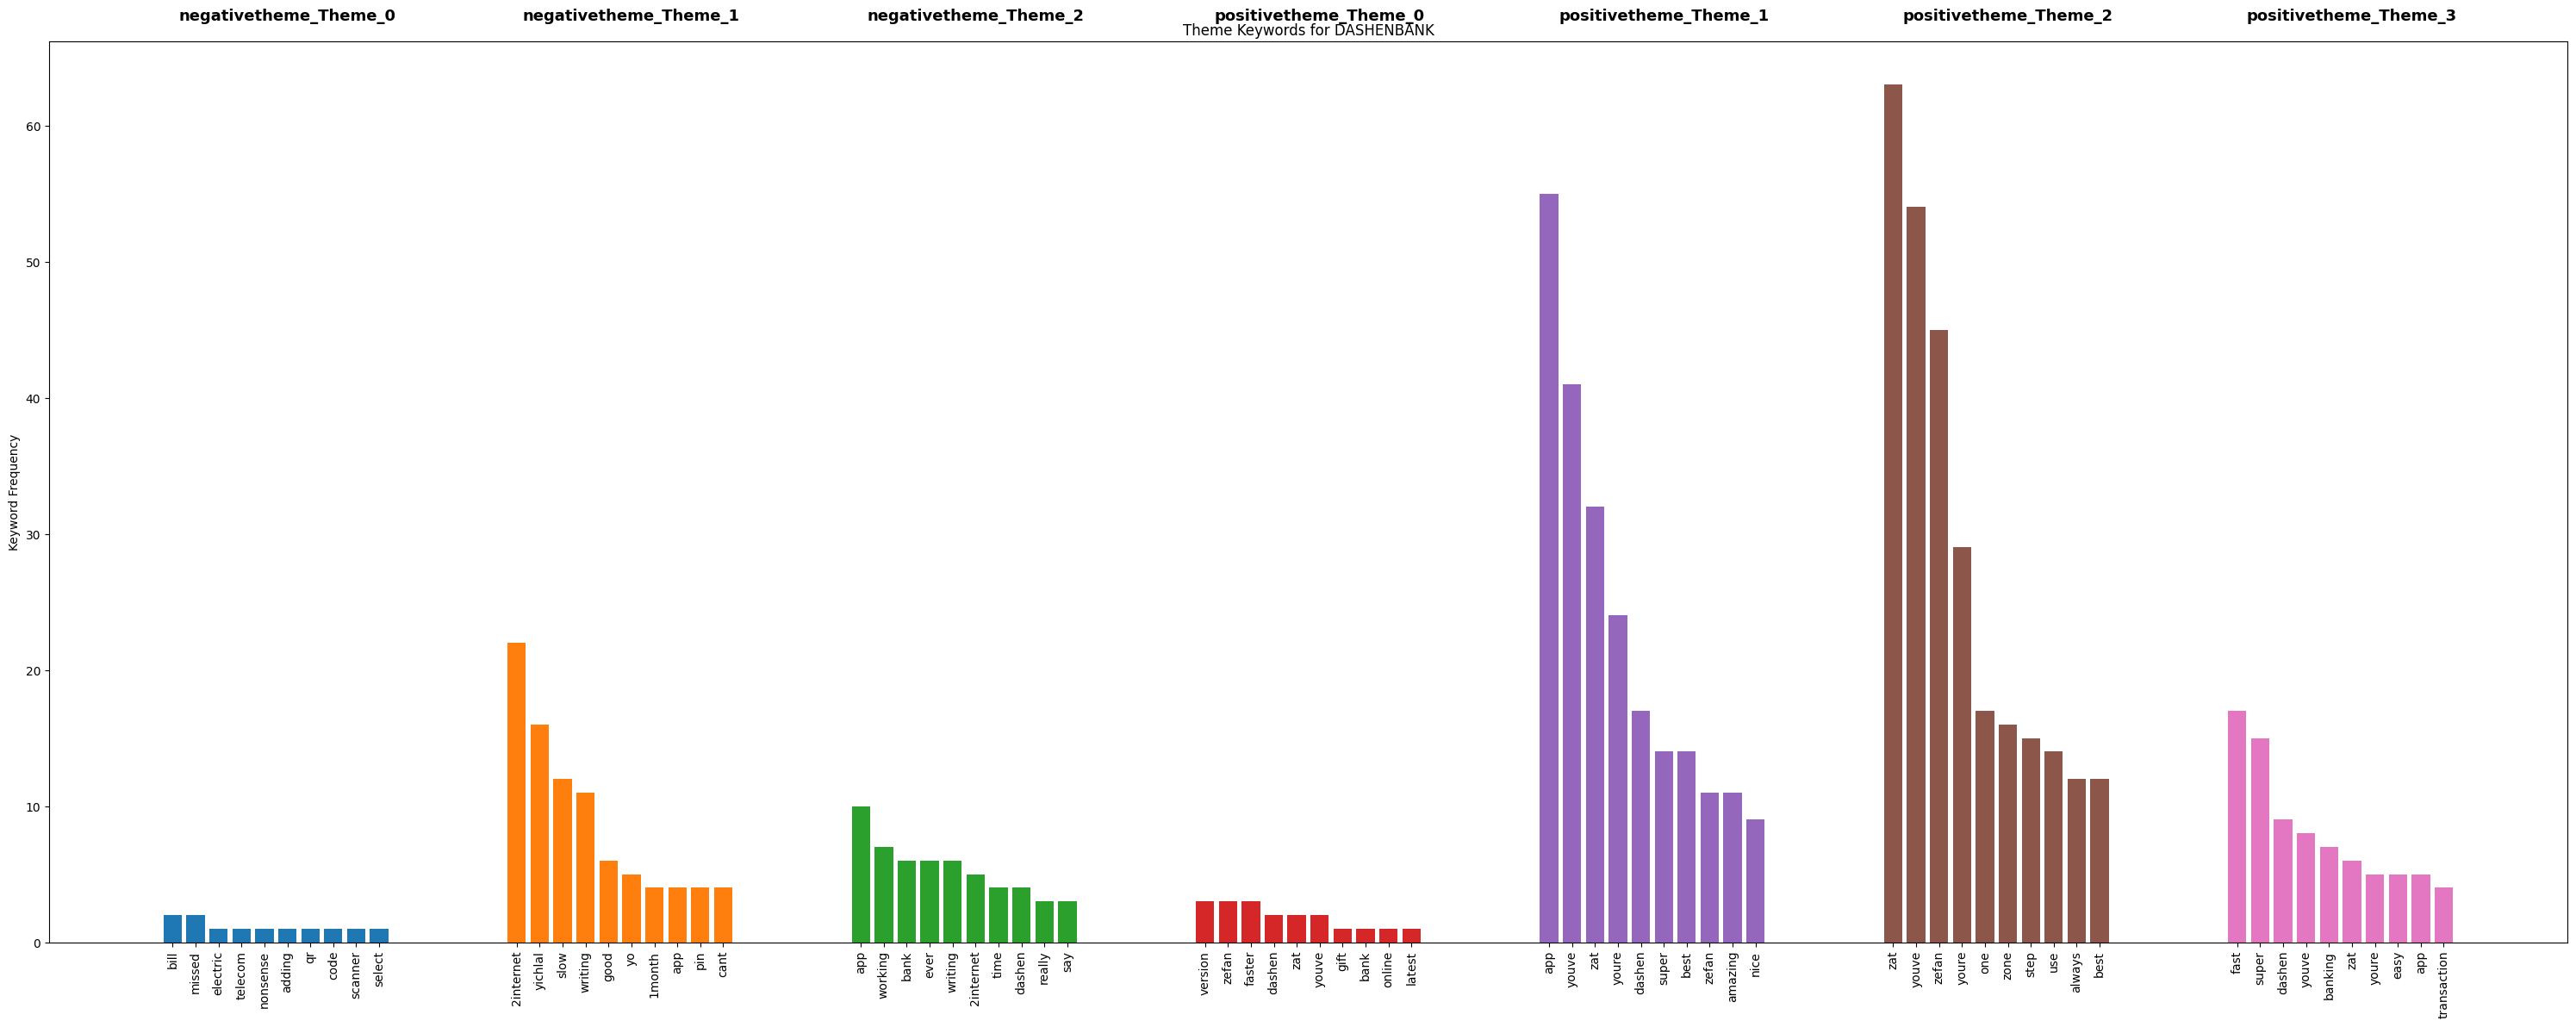

^C


<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1:

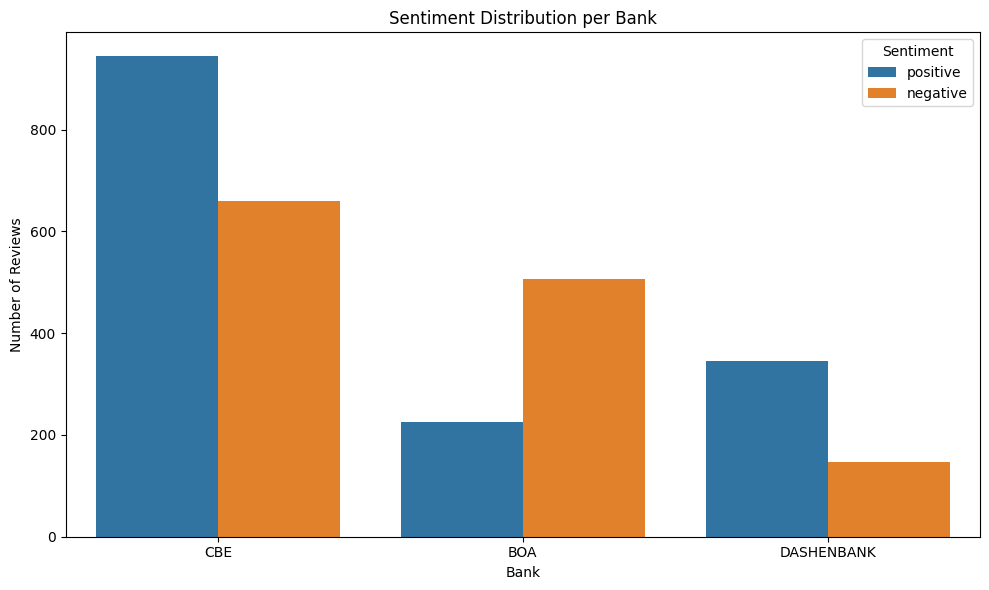

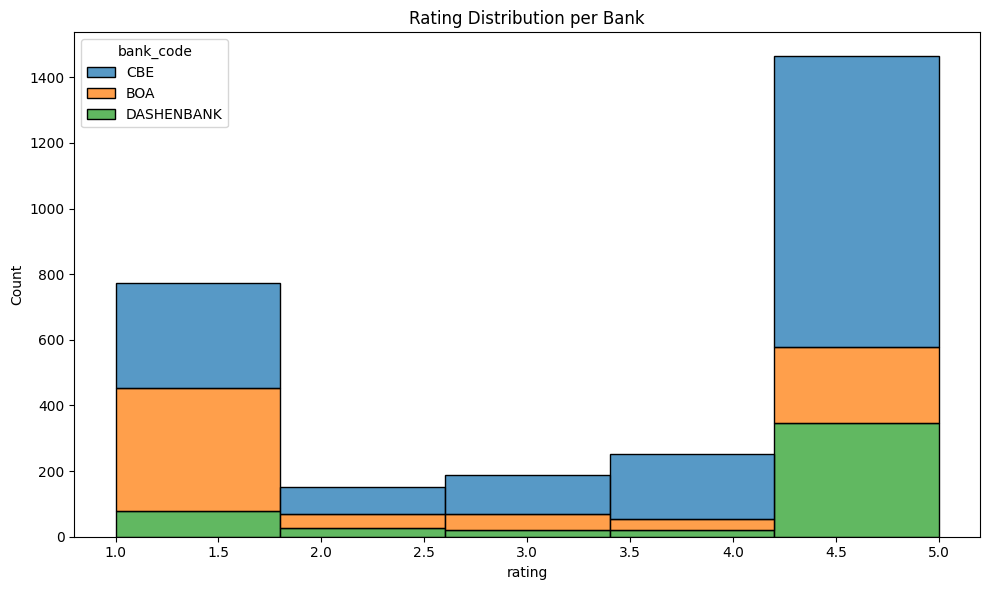

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
import re

!pip install pyecharts

# Pyecharts WordCloud
from pyecharts.charts import WordCloud as PyeWordCloud
from pyecharts import options as opts
from pyecharts.globals import SymbolType

# Utilities to open HTML in browser
import webbrowser
import os

# For counting keywords
from collections import Counter

# ============================================================
# Load your two theme files
pos_df = pd.read_csv("../output/positive_reviews_with_themes.csv")
neg_df = pd.read_csv("../output/negative_reviews_with_themes.csv")

# Add a correct sentiment_group label
pos_df["sentiment_group"] = "positive"
neg_df["sentiment_group"] = "negative"
# Combine into one dataset
df = pd.concat([pos_df, neg_df], ignore_index=True)
# clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    return re.sub(r"\s+", " ", text).strip()

df["cleaned_text"] = df["review_text"].apply(clean_text)

# Parse keywords column (strings → list)
def parse_keywords(x):
    if pd.isna(x) or not isinstance(x, str):
        return []
    try:
        return ast.literal_eval(x)
    except:
        return [w.strip() for w in x.split(",")]
    
df["keywords"] = df["keywords"].apply(parse_keywords)

ordered_themes = [
    "negativetheme_Theme_0",
    "negativetheme_Theme_1",
    "negativetheme_Theme_2",
    "positivetheme_Theme_0",
    "positivetheme_Theme_1",
    "positivetheme_Theme_2",
    "positivetheme_Theme_3"
]
# ============================================================
# Sentiment Distribution per Bank
# ============================================================  
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="bank_code", hue="sentiment_group")
plt.title("Sentiment Distribution per Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()
# ============================================================
# Rating Distribution per Bank  
# ============================================================

score_column = "rating" if "rating" in df.columns else "score"

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=score_column, hue="bank_code",
             multiple="stack", bins=5)
plt.title("Rating Distribution per Bank")
plt.tight_layout()
plt.show()

# ============================================================
# SENTIMENT TREND OVER TIME
# ============================================================

df["review_date"] = pd.to_datetime(df["review_date"])
df["month"] = df["review_date"].dt.to_period("M").astype(str)

monthly = df.groupby(["month", "bank_code", "sentiment_group"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly, x="month", y="count", hue="sentiment_group", style="bank_code")
plt.xticks(rotation=45)
plt.title("Monthly Sentiment Trend")
plt.tight_layout()
plt.show()

# ============================================================
# MOST COMMON KEYWORDS PER THEME — SHOW THEME LABEL ONCE
# ============================================================

def count_keywords_for_bank(df, bank_code, ordered_themes, top_n=10):
    bank_df = df[df["bank_code"] == bank_code]
    final_counts = {}

    for theme in ordered_themes:
        subset = bank_df[bank_df["theme"] == theme]

        all_keywords = []
        for lst in subset["keywords"]:
            all_keywords.extend(lst)

        counts = Counter(all_keywords)
        final_counts[theme] = dict(counts.most_common(top_n))

    return final_counts

def plot_keywords_grouped(bank_code, keyword_counts, ordered_themes):
    plt.figure(figsize=(30, 12))

    x_positions = []
    x_labels = []
    theme_centers = []
    offset = 0

    for theme in ordered_themes:
        kws = list(keyword_counts[theme].keys())
        vals = list(keyword_counts[theme].values())
        
        if not kws:
            continue

        xs = [offset + i for i in range(len(kws))]
        plt.bar(xs, vals)

        x_positions.extend(xs)
        x_labels.extend(kws)

        # Track the center position for theme label
        theme_centers.append((xs[len(xs)//2], theme))

        offset += len(kws) + 5  # space between groups

    plt.xticks(x_positions, x_labels, rotation=90)
    plt.ylabel("Keyword Frequency")
    plt.title(f"Theme Keywords for {bank_code}")

    # Add theme name ONCE per group
    for pos, theme in theme_centers:
        plt.text(pos, plt.ylim()[1] * 1.02, theme,
                 ha="center", va="bottom", fontsize=13, fontweight="bold")

    plt.tight_layout()
    plt.show()

banks = ["CBE", "BOA", "DASHENBANK"]

for bank in banks:
    print(f"\n--- {bank} ---")
    keyword_counts = count_keywords_for_bank(df, bank, ordered_themes)
    plot_keywords_grouped(bank, keyword_counts, ordered_themes)

 # ============================================================
# WORD CLOUDS USING PYECHARTS
# ============================================================

from pyecharts.charts import WordCloud as PyeWordCloud
from pyecharts import options as opts
from pyecharts.globals import SymbolType
import webbrowser
import os

def generate_wordcloud_pyecharts(keywords, title, output_file):
    # Count keyword frequencies
    from collections import Counter
    counts = Counter(keywords)
    data = list(counts.items())  # list of tuples (word, count)
    
    wc = (
        PyeWordCloud()
        .add("", data, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
        .set_global_opts(title_opts=opts.TitleOpts(title=title))
    )
    
    wc.render(output_file)  # generate HTML file
    # automatically open in default browser
    webbrowser.open("file://" + os.path.abspath(output_file))

# Positive keywords
pos_words = df[df["sentiment_group"]=="positive"]["keywords"].explode().dropna().tolist()
generate_wordcloud_pyecharts(pos_words, "Positive Review Keywords", "positive_wordcloud.html")

# Negative keywords
neg_words = df[df["sentiment_group"]=="negative"]["keywords"].explode().dropna().tolist()
generate_wordcloud_pyecharts(neg_words, "Negative Review Keywords", "negative_wordcloud.html")



In [ ]:
# ============================================================
# MOST COMMON KEYWORDS PER THEME — SHOW THEME LABEL ONCE
# ============================================================

def count_keywords_for_bank(df, bank_code, ordered_themes, top_n=10):
    bank_df = df[df["bank_code"] == bank_code]
    final_counts = {}

    for theme in ordered_themes:
        subset = bank_df[bank_df["theme"] == theme]

        all_keywords = []
        for lst in subset["keywords"]:
            all_keywords.extend(lst)

        counts = Counter(all_keywords)
        final_counts[theme] = dict(counts.most_common(top_n))

    return final_counts

def plot_keywords_grouped(bank_code, keyword_counts, ordered_themes):
    plt.figure(figsize=(30, 12))

    x_positions = []
    x_labels = []
    theme_centers = []
    offset = 0

    for theme in ordered_themes:
        kws = list(keyword_counts[theme].keys())
        vals = list(keyword_counts[theme].values())
        
        if not kws:
            continue

        xs = [offset + i for i in range(len(kws))]
        plt.bar(xs, vals)

        x_positions.extend(xs)
        x_labels.extend(kws)

        # Track the center position for theme label
        theme_centers.append((xs[len(xs)//2], theme))

        offset += len(kws) + 5  # space between groups

    plt.xticks(x_positions, x_labels, rotation=90)
    plt.ylabel("Keyword Frequency")
    plt.title(f"Theme Keywords for {bank_code}")

    # Add theme name ONCE per group
    for pos, theme in theme_centers:
        plt.text(pos, plt.ylim()[1] * 1.02, theme,
                 ha="center", va="bottom", fontsize=13, fontweight="bold")

    plt.tight_layout()
    plt.show()

banks = ["CBE", "BOA", "DASHENBANK"]

for bank in banks:
    print(f"\n--- {bank} ---")
    keyword_counts = count_keywords_for_bank(df, bank, ordered_themes)
    plot_keywords_grouped(bank, keyword_counts, ordered_themes)

 # ============================================================
# WORD CLOUDS USING PYECHARTS
# ============================================================

from pyecharts.charts import WordCloud as PyeWordCloud
from pyecharts import options as opts
from pyecharts.globals import SymbolType
import webbrowser
import os

def generate_wordcloud_pyecharts(keywords, title, output_file):
    # Count keyword frequencies
    from collections import Counter
    counts = Counter(keywords)
    data = list(counts.items())  # list of tuples (word, count)
    
    wc = (
        PyeWordCloud()
        .add("", data, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
        .set_global_opts(title_opts=opts.TitleOpts(title=title))
    )
    
    wc.render(output_file)  # generate HTML file
    # automatically open in default browser
    webbrowser.open("file://" + os.path.abspath(output_file))

# Positive keywords
pos_words = df[df["sentiment_group"]=="positive"]["keywords"].explode().dropna().tolist()
generate_wordcloud_pyecharts(pos_words, "Positive Review Keywords", "positive_wordcloud.html")

# Negative keywords
neg_words = df[df["sentiment_group"]=="negative"]["keywords"].explode().dropna().tolist()
generate_wordcloud_pyecharts(neg_words, "Negative Review Keywords", "negative_wordcloud.html")

